<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Contents: Supervised Learning Project
1. [Part-A: Solution](#Part-A:-Solution)
2. [Part-B: Solution](#Part-B:-Solution)

# Part-A: Solution

- **DOMAIN:** Medical
- **CONTEXT:** Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.
- **DATA DESCRIPTION:** The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.
 1. P_incidence
 2. P_tilt
 3. L_angle
 4. S_slope
 5. P_radius
 6. S_Degree
 7. Class
- **PROJECT OBJECTIVE:** To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

In [1]:
# Import all the relevant libraries needed to complete the analysis, visualization, modeling and presentation
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline

from scipy import stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

## 1. Data Understanding:

### 1A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [2]:
# CSV File 1, 2 and 3
dfa1=pd.read_csv('Part1+-+Normal.csv')

dfa2=pd.read_csv('Part1+-+Type_H.csv')

dfa3=pd.read_csv('Part1+-+Type_S.csv')

### 1B. Print Shape and columns of all the 3 DataFrames.

In [3]:
dfa1.shape

(100, 7)

In [4]:
dfa1.info()
dfa1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal

In [5]:
dfa2.shape

(60, 7)

In [6]:
dfa2.info()
dfa2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H

In [7]:
dfa3.shape

(150, 7)

In [8]:
dfa3.info()
dfa3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type_S
1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type_S
2    44.529051   9.433234  52.000000  35.095817  134.711772  29.106575  Type_S
3    77.690577  21.380645  64.429442  56.309932  114.818751  26.931841  Type_S
4    76.147212  21.936186  82.961502  54.211027  123.932010  10.431972  Type_S

### 1C. Compare Column names of all the 3 DataFrames and clearly write observations

**Observations:**

- All 3 datasets have common column names and datatypes.
- Corresponding dataset rows are 100, 60, 150; all datasets have 7 columns.
- Datatype of first 6 columns is float64, Datatype of last column is object.
- There are no junk values in the dataset.
- Considering the shape and dimensions of the datasets it would be easy to append or concatenate them to form a single dataframe.
- First 6 features will form the features matrix, and the last column is the target vector.
- Class is object we need to change the datatype of this column for better performance.
-  Explore for null/missing values in the attributes and if required drop or impute values.

### 1D. Print DataTypes of all the 3 DataFrames.

In [9]:
dfa1.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [10]:
dfa2.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [11]:
dfa3.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

### 1E. Observe and share variation in ‘Class’ feature of all the 3 DataFrames

In [12]:
dfa1['Class'].value_counts()

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [13]:
dfa2['Class'].value_counts()

Type_H    37
type_h    23
Name: Class, dtype: int64

In [14]:
dfa3['Class'].value_counts()

Type_S    133
tp_s       17
Name: Class, dtype: int64

**Observations:**
- Here we have three different classes in our dataset.
- Here tp_s and Type_S; Normal and Nrmal; Type_H and type_h; represents same class.
- There are some rows in which the target variable "Class" is not properly specified. We can use selection/subsetting tricks or Use .replace function to correct the data in 'Class' column.
- All the variations in Class can be unified to create a correct target vector.

## 2. Data Preparation and Exploration:

### 2A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames.
For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’

In [15]:
dfa1.loc[dfa1['Class']=='Nrmal','Class']='Normal'
dfa2.loc[dfa2['Class']=='type_h','Class']='Type_H'
dfa3.loc[dfa3['Class']=='tp_s','Class']='Type_S'

### 2B. Combine all the 3 DataFrames to form a single DataFrame
Checkpoint: Expected Output shape = (310,7)

In [16]:
# Concatenate pandas objects along a particular axis with optional set logic along the other axes.
dfa=pd.concat([dfa1,dfa2,dfa3],axis=0,ignore_index=True,sort=False) 
dfa.shape

(310, 7)

In [17]:
# Understand and verify the Class variable
dfa['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [18]:
dfa['Class'].nunique()

3

### 2C. Print 5 random samples of this DataFrame

In [19]:
# Return a random sample of items from an axis of object.
# You can use `random_state` for reproducibility.

dfa.sample(n=5)

# df.sample(frac = 0.5)
# df.sample(n = 5, replace = False)
# df.sample(n = 5, replace = True)
# df.sample(axis = 0)
# df.sample(axis = 1)
# df.sample(n = 5, random_state = 2)

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
121    54.919443  21.062332  42.200000  33.857110  125.212716   2.432561   
145    50.912440  23.015169  47.000000  27.897271  117.422259  -2.526702   
15     59.726140   7.724873  55.343485  52.001268  125.174221   3.235159   
69     48.801909  18.017762  52.000000  30.784147  139.150407  10.442862   
286    81.082320  21.255840  78.766756  59.826480   90.071880  49.159426   

      Class  
121  Type_H  
145  Type_H  
15   Normal  
69   Normal  
286  Type_S

In [20]:
dfa.sample(n=5)

P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
76     61.734875  17.114312  46.900000  44.620563  120.920200   3.087726   
104    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   
14     89.834676  22.639217  90.563461  67.195460  100.501192   3.040973   
103    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
112    48.915551  19.964556  40.263794  28.950995  119.321358   8.028895   

      Class  
76   Normal  
104  Type_H  
14   Normal  
103  Type_H  
112  Type_H

### 2D. Print Feature-wise percentage of Null values.

In [21]:
# There are no missing values in the dataset

# df.isnull().sum()
# df.isna().sum()

def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(dfa)

Total  Percent
P_incidence      0      0.0
P_tilt           0      0.0
L_angle          0      0.0
S_slope          0      0.0
P_radius         0      0.0
S_Degree         0      0.0
Class            0      0.0

### 2E. Check 5-point summary of the new DataFrame.

In [22]:
# Describe function generates descriptive statistics that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.

# This method tells us a lot of things about a dataset. One important thing is that 
# the describe() method deals only with numeric values. It doesn't work with any 
# categorical values. So if there are any categorical values in a column the describe() 
# method will ignore it and display summary for the other columns.

dfa.describe().transpose()

count        mean        std        min         25%         50%  \
P_incidence  310.0   60.496653  17.236520  26.147921   46.430294   58.691038   
P_tilt       310.0   17.542822  10.008330  -6.554948   10.667069   16.357689   
L_angle      310.0   51.930930  18.554064  14.000000   37.000000   49.562398   
S_slope      310.0   42.953831  13.423102  13.366931   33.347122   42.404912   
P_radius     310.0  117.920655  13.317377  70.082575  110.709196  118.268178   
S_Degree     310.0   26.296694  37.559027 -11.058179    1.603727   11.767934   

                    75%         max  
P_incidence   72.877696  129.834041  
P_tilt        22.120395   49.431864  
L_angle       63.000000  125.742385  
S_slope       52.695888  121.429566  
P_radius     125.467674  163.071041  
S_Degree      41.287352  418.543082

In [23]:
#Change the Data Type of 'Class' from object to category

dfa['Class']=dfa['Class'].astype('category') 

**Observations:**
- P_incidence:
 - Mean and Median are nearly equal. Distribution might be normal. 
 - 75 % of values are less than 72, and maximum value is 129.

- P_tilt:
 - Mean and median are nearly equal. Distribution might be normal.
 - It contains negative values; 75 % of values are less than 22, and maximum value is 49. Some right skewness is expected.

- L_angle:
 - Mean and Median are nearly equal. There is no deviation. Distribution might be normal.
 - There might be few outliers because of the maximum value.

- S_slope:
 - Mean and Median are nearly equal.
 - 75% of values are less than 52, and maximum value is 121.

- P_radius:
 - Distribution might be normal.
 - Not much deviation in the data.

- S_Degree:
 - Mean is greater than Median so there might be right skewness in the data .
 - We can see 75% of values are less than 41, and maximum value is 418;Outliers are expected.

## 3. Data Analysis

### 3A. Visualize a heatmap to understand correlation between all features

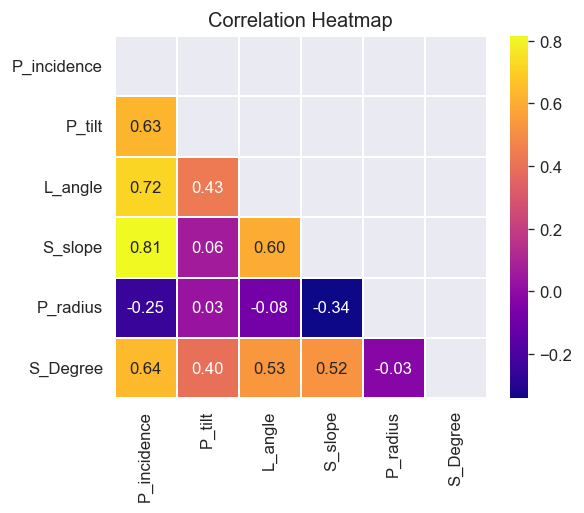

In [24]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(dfa.corr()))
sns.heatmap(dfa.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
corr = dfa.corr()
corr

P_incidence    P_tilt   L_angle   S_slope  P_radius  S_Degree
P_incidence     1.000000  0.629199  0.717282  0.814960 -0.247467  0.638743
P_tilt          0.629199  1.000000  0.432764  0.062345  0.032668  0.397862
L_angle         0.717282  0.432764  1.000000  0.598387 -0.080344  0.533667
S_slope         0.814960  0.062345  0.598387  1.000000 -0.342128  0.523557
P_radius       -0.247467  0.032668 -0.080344 -0.342128  1.000000 -0.026065
S_Degree        0.638743  0.397862  0.533667  0.523557 -0.026065  1.000000

In [26]:
dfa.var()

P_incidence     297.097633
P_tilt          100.166675
L_angle         344.253290
S_slope         180.179672
P_radius        177.352531
S_Degree       1410.680476
dtype: float64

### 3B. Share insights on correlation.
- Features having stronger correlation with correlation value.
- Features having weaker correlation with correlation value.

**Observations:**
- Corresponding Correlation is high between P_incidence and S_slope, L_angle.
- S_degree and p_radius has negative correlation. Negative correlation is present.
- Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.

### 3C. Visualize a pairplot with 3 classes distinguished by colors and share insights.

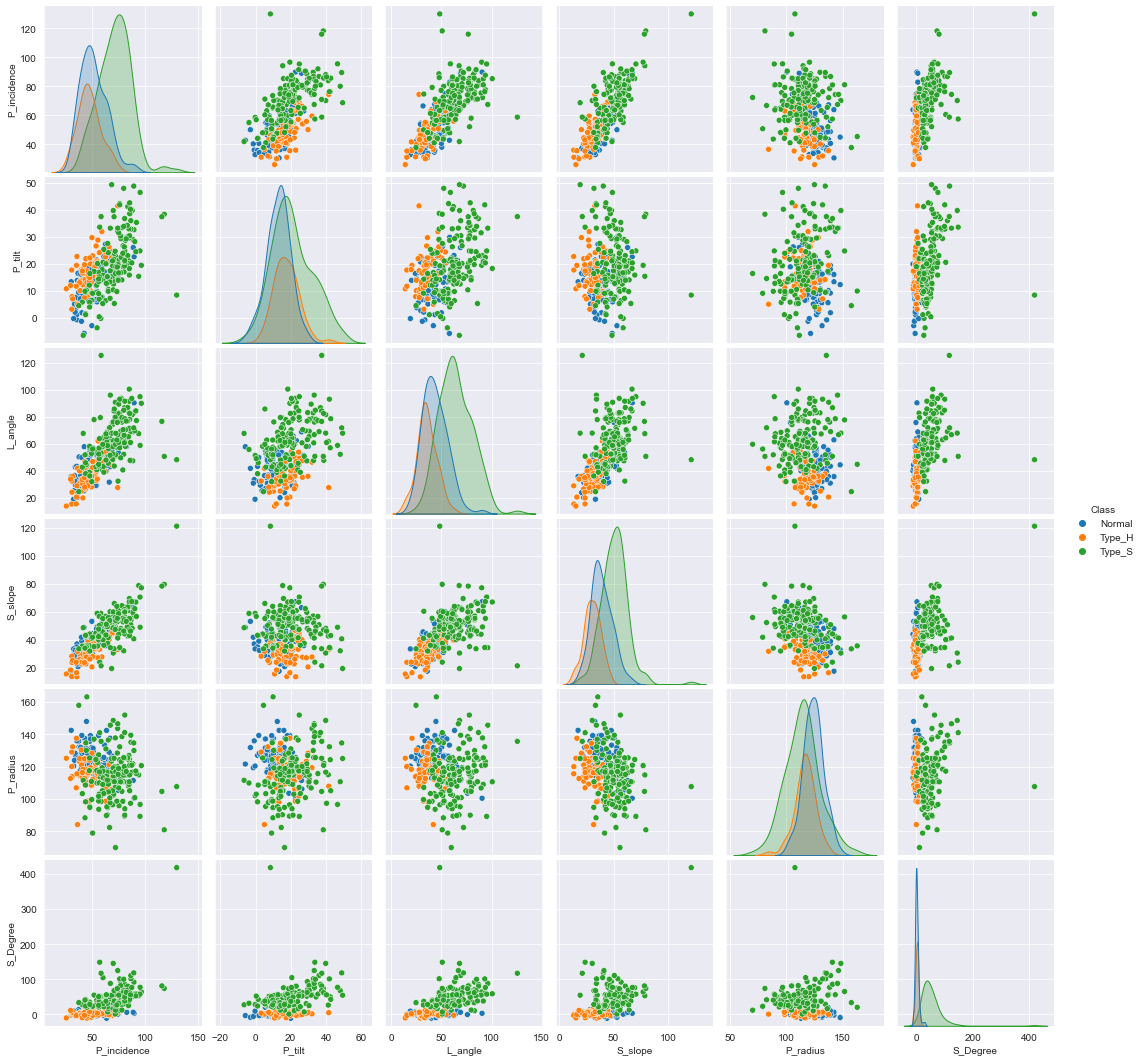

In [27]:
sns.pairplot(dfa,hue='Class')

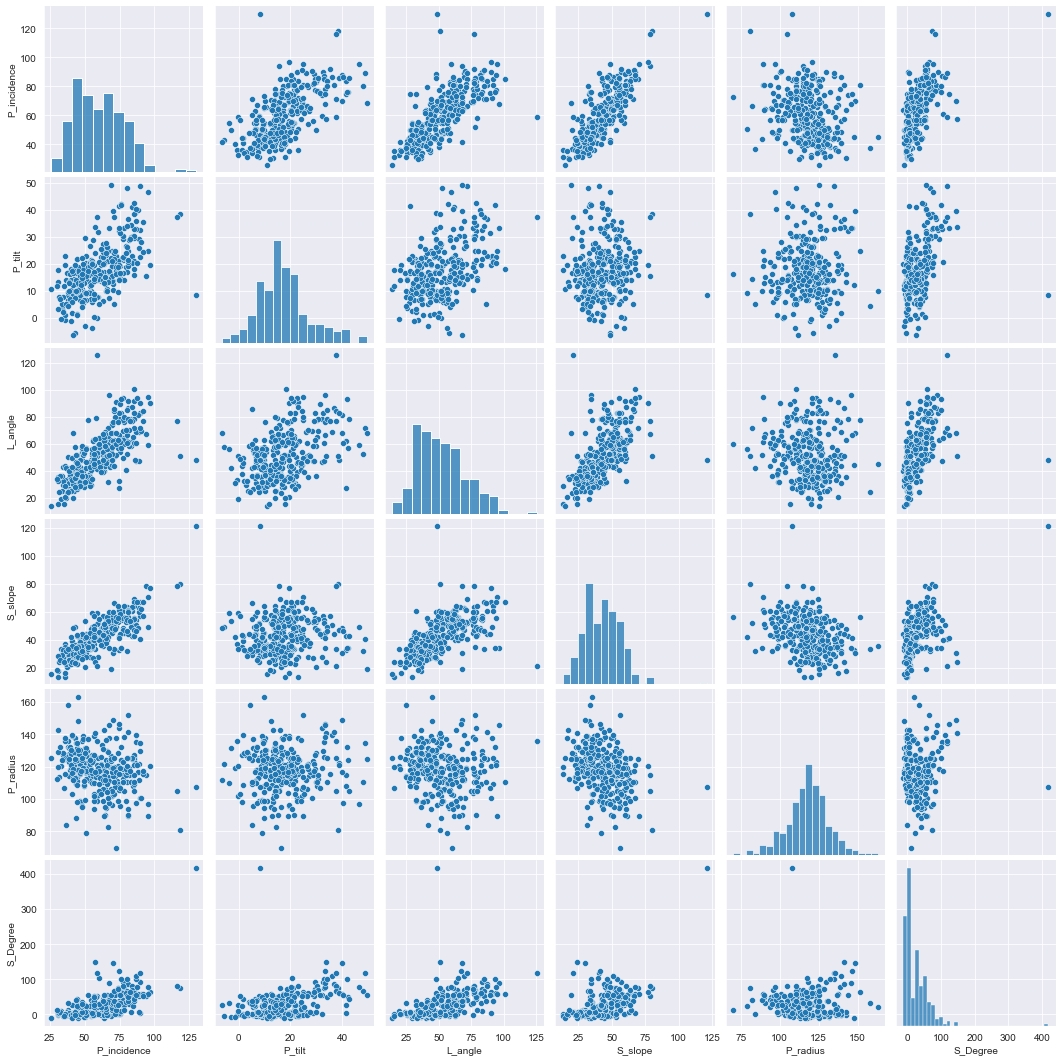

In [28]:
sns.pairplot(dfa)

# sns.pairplot(dfa, hue="Class", diag_kind="hist")

**Insights:**

- Along the diagonal, we can see the distribution of individual variables with histogram. 
- Along the diagonal, we can see distribution of variables for three classes are not same.
- It is evident that Type_S class is more compared to other two classes.
- P_incidence has positive relationship with all variables except P_radius. Relationship is higher for S_slope and L_angle.
- P_tilt has Higher Relationship with P_incidence and L_angle.There is no Relationship with S_slope and P_radius.
- L_angle has positive Relationship with P_tilt, S_slope and S_Degree. It has no Relationship with P_radius.
- S_slope has positive Relationship with L_angle and S_Degree.
- P_radius has no Relationship with S_degree, P_tilt, L_angle.
- S_degree has no strong positive Relationship with any of the variables.

### 3D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights.

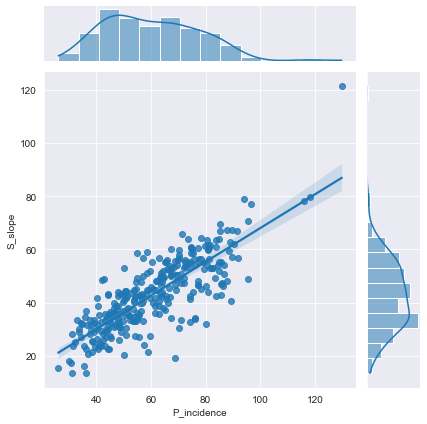

In [29]:
sns.jointplot(data = dfa, x="P_incidence", y="S_slope", kind = "reg")

**Observations:**
- Positive correlation exists between P_incidence and S_slope.
- Data distribution is almost like normal except some skewness.
- Presence of outliers affect the value of regression coefficients.

### 3E. Visualize a boxplot to check distribution of the features and share insights.
- Understand the data distribution for independent variables
- Understand the outliers
- Check for imbalanced dataset
- Understand the data distribution with respect to the target vector

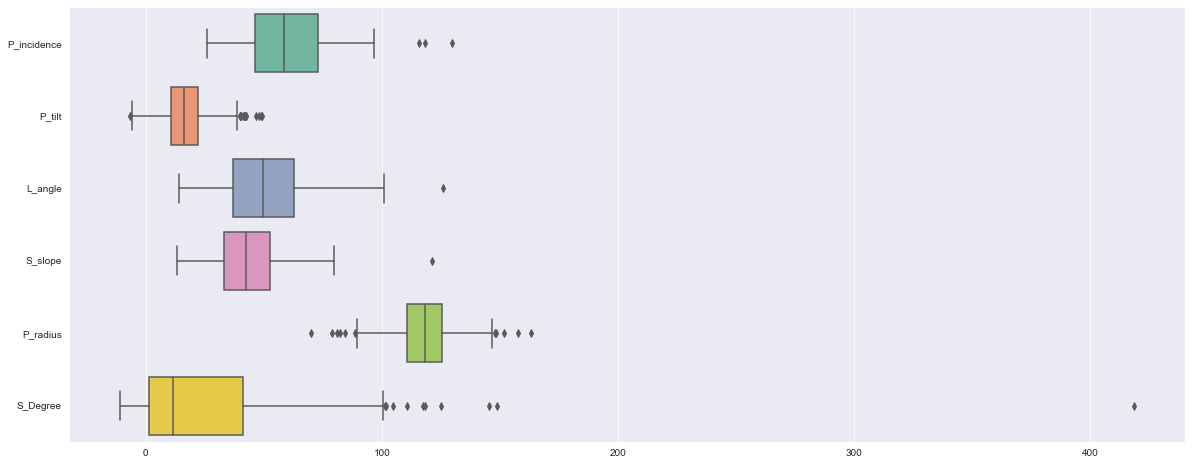

In [30]:
# Box Plot

plt.figure(figsize=(20,8))
ax = sns.boxplot(data=dfa, orient="h", palette="Set2")

**Insights (See below charts for more details):**
- P_incidence
 - Normal distribution is maintained with very less extreme values.
 - Total number of outliers in column = 3.
- P_tilt
 - Data is Normally distributed and we can see one peakness in the center. Slight right skewness is present.
 - We can see one outlier in negative end and few outliers in positive end.
- L_angle
 - Data distribution is normal.
 - Little right skewness because of one outlier.
- S_slope
 - Data distribution is normal.
 - Little right skewness because of one outlier.
- P_radius
 - Data is normally distributed
 - We can see outliers at both the ends.
- S_Degree
 - There is Positive Skewness in the data.
 - Distribution is hugely affected by Outliers.

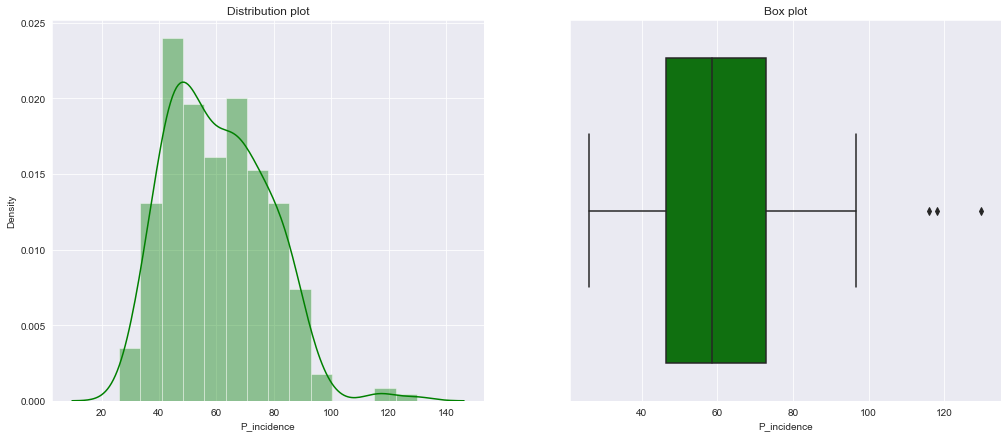

 Total Number of outliers in P_incidence: 3


In [31]:
# P_incidence

# Distribution and box plot
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(dfa['P_incidence'],  ax=axes[0],color='Green')
sns.boxplot(x = 'P_incidence', data=dfa,  orient='h' , ax=axes[1],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

# Outlier detection
q25,q75=np.percentile(dfa['P_incidence'],25),np.percentile(dfa['P_incidence'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfa['P_incidence'] if i < lower or i > upper]
print('{} Total Number of outliers in P_incidence: {}'.format('\033[1m',len(Outliers)))

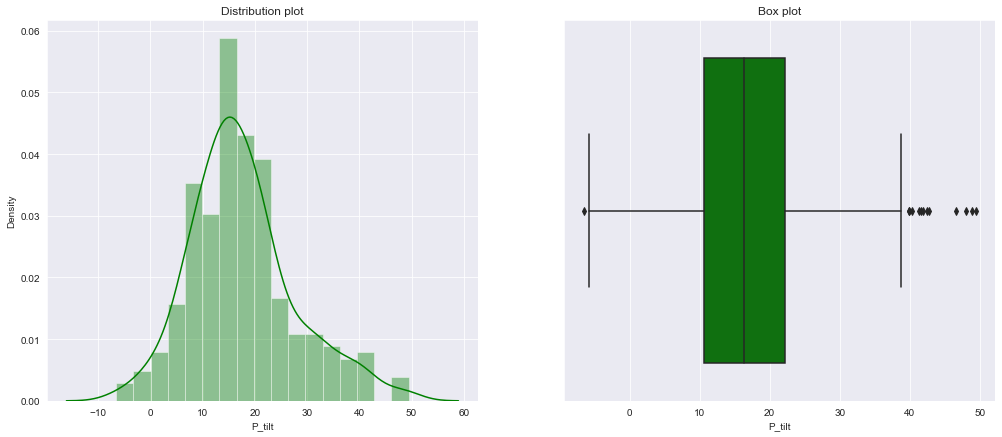

 Total Number of outliers in P_tilt: 13


In [32]:
# P_tilt

# Distribution and box plot
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(dfa['P_tilt'],  ax=axes[0],color='Green')
sns.boxplot(x = 'P_tilt', data=dfa,  orient='h' , ax=axes[1],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

# Outlier detection
q25,q75=np.percentile(dfa['P_tilt'],25),np.percentile(dfa['P_tilt'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfa['P_tilt'] if i < lower or i > upper]
print('{} Total Number of outliers in P_tilt: {}'.format('\033[1m',len(Outliers)))

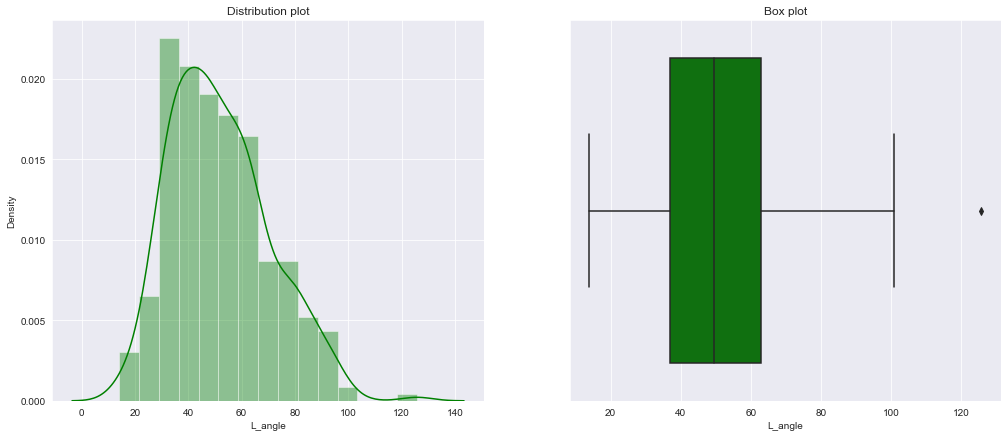

 Total Number of outliers in L_angle: 1


In [33]:
# L_angle

# Distribution and box plot
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(dfa['L_angle'],  ax=axes[0],color='Green')
sns.boxplot(x = 'L_angle', data=dfa,  orient='h' , ax=axes[1],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

# Outlier detection
q25,q75=np.percentile(dfa['L_angle'],25),np.percentile(dfa['L_angle'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfa['L_angle'] if i < lower or i > upper]
print('{} Total Number of outliers in L_angle: {}'.format('\033[1m',len(Outliers)))

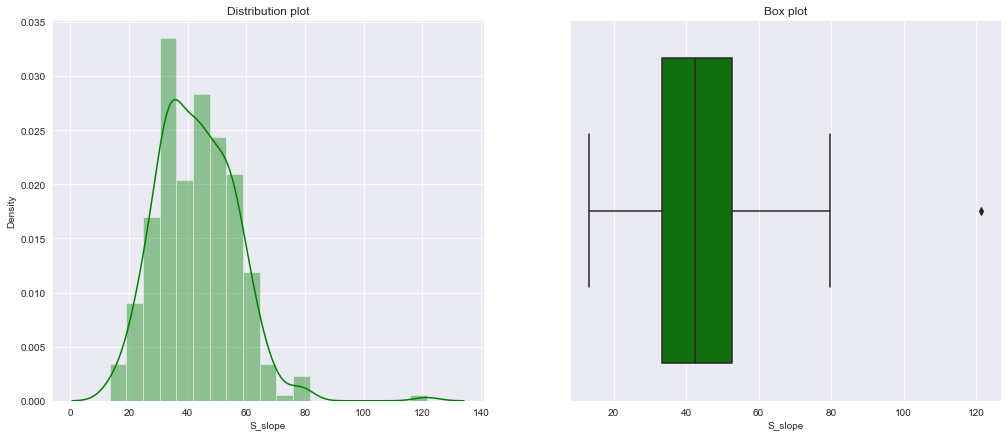

 Total Number of outliers in S_slope: 1


In [34]:
# S_slope

# Distribution and box plot
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(dfa['S_slope'],  ax=axes[0],color='Green')
sns.boxplot(x = 'S_slope', data=dfa,  orient='h' , ax=axes[1],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

# Outlier detection
q25,q75=np.percentile(dfa['S_slope'],25),np.percentile(dfa['S_slope'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfa['S_slope'] if i < lower or i > upper]
print('{} Total Number of outliers in S_slope: {}'.format('\033[1m',len(Outliers)))

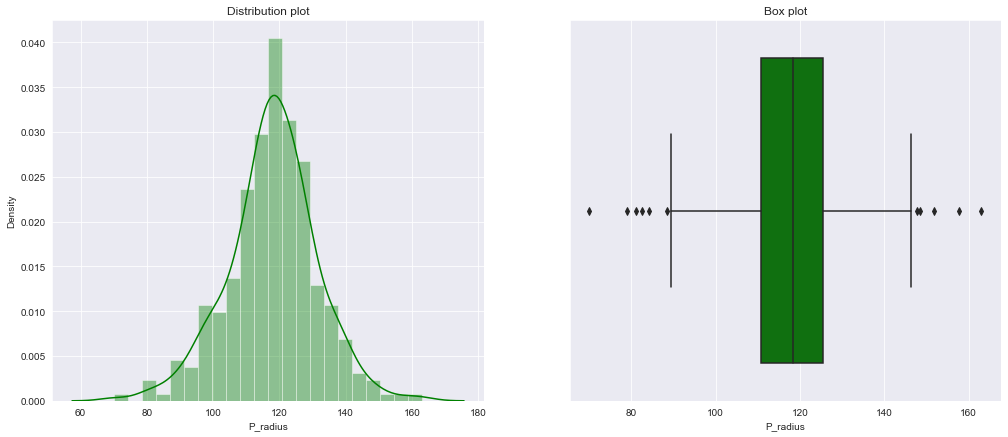

 Total Number of outliers in P_radius: 11


In [35]:
# P_radius

# Distribution and box plot
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(dfa['P_radius'],  ax=axes[0],color='Green')
sns.boxplot(x = 'P_radius', data=dfa,  orient='h' , ax=axes[1],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

# Outlier detection
q25,q75=np.percentile(dfa['P_radius'],25),np.percentile(dfa['P_radius'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfa['P_radius'] if i < lower or i > upper]
print('{} Total Number of outliers in P_radius: {}'.format('\033[1m',len(Outliers)))

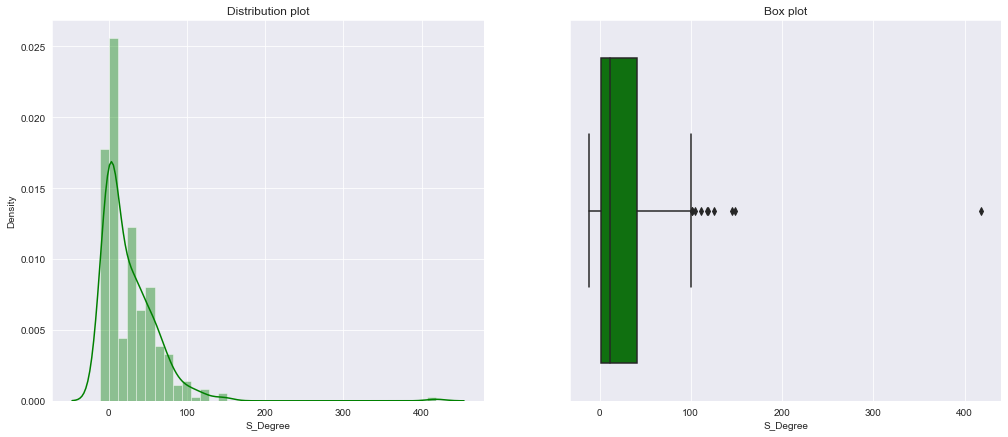

 Total Number of outliers in S_Degree: 10


In [36]:
# S_Degree

# Distribution and box plot
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.distplot(dfa['S_Degree'],  ax=axes[0],color='Green')
sns.boxplot(x = 'S_Degree', data=dfa,  orient='h' , ax=axes[1],color='Green')
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

# Outlier detection
q25,q75=np.percentile(dfa['S_Degree'],25),np.percentile(dfa['S_Degree'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfa['S_Degree'] if i < lower or i > upper]
print('{} Total Number of outliers in S_Degree: {}'.format('\033[1m',len(Outliers)))

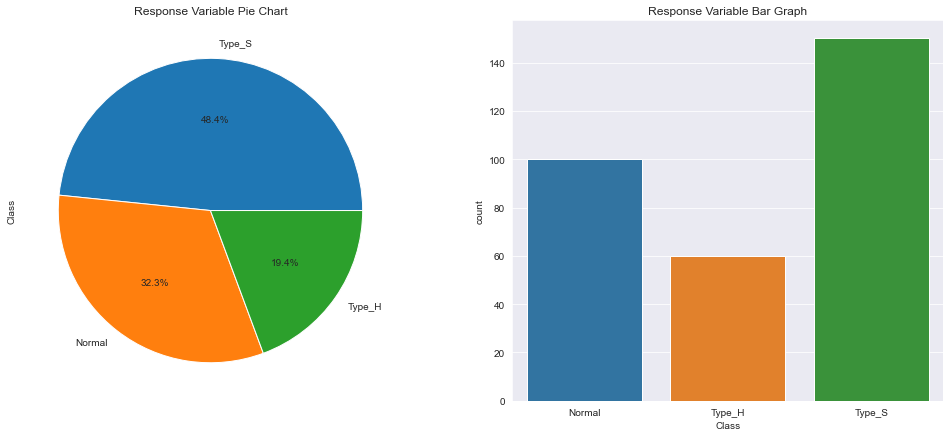

In [37]:
# Check for imbalanced dataset

f,axes=plt.subplots(1,2,figsize=(17,7))
dfa['Class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
sns.countplot('Class',data=dfa,ax=axes[1])
axes[0].set_title('Response Variable Pie Chart')
axes[1].set_title('Response Variable Bar Graph')
plt.show()

In [38]:
# Normal:0; Type_H:1; Type_S:2

dfa.groupby(["Class"]).count()

P_incidence  P_tilt  L_angle  S_slope  P_radius  S_Degree
Class                                                            
Normal          100     100      100      100       100       100
Type_H           60      60       60       60        60        60
Type_S          150     150      150      150       150       150

**Insights:**
- Type_S Class has 48.4% of total values followed by Normal and Type_H Classes.
- The ratio of distribution of three classes is 32:19:48, which shows imbalance of class feature i.e. Target Variable.
- The above graph shows that the data is biased towards datapoints having class value as 2 -'Type _S'. 
- The number of data points of Class 1 - 'Type_H' is almost half the number of 'Type_S patients.

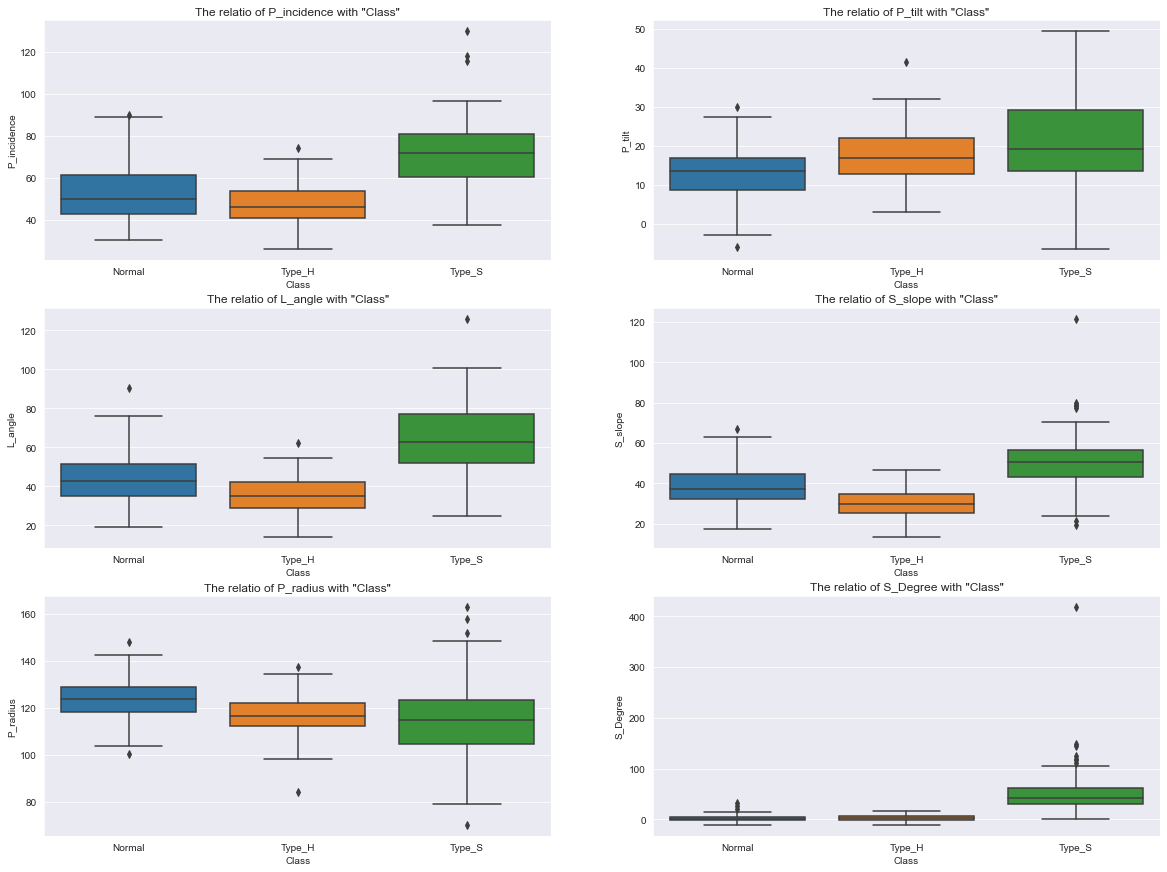

In [39]:
# Understand the data distribution with respect to the target vector

plt.figure(figsize=(20,15))

plt.subplot(3, 2, 1)
plt.title('The relatio of P_incidence with "Class"')
sns.boxplot(x='Class', y='P_incidence', data= dfa)

plt.subplot(3, 2, 2)
plt.title('The relatio of P_tilt with "Class"')
sns.boxplot(x='Class', y='P_tilt', data= dfa)

plt.subplot(3, 2, 3)
plt.title('The relatio of L_angle with "Class"')
sns.boxplot(x='Class', y='L_angle', data= dfa)

plt.subplot(3, 2, 4)
plt.title('The relatio of S_slope with "Class"')
sns.boxplot(x='Class', y='S_slope', data= dfa)

plt.subplot(3, 2, 5)
plt.title('The relatio of P_radius with "Class"')
sns.boxplot(x='Class', y='P_radius', data= dfa)

plt.subplot(3, 2, 6)
plt.title('The relatio of S_Degree with "Class"')
sns.boxplot(x='Class', y='S_Degree', data= dfa)

plt.show()

**Observations:**
- P_Incidence
 - Normal Value is slightly higher than Type_H, and for Type_S Class Value is larger.

- P_tilt
 - Type_H is slightly higher than Normal Value, and for Type_S Class Value is larger.

- L_angle 
 - It has higher value for Type_S Class; and Normal class has higher values compared to type_H class.

- S_slope 
 - We can see huge values for Type_S class.

- P_radius 
 - Normal Class has more values. There are some extreme values for Type_s class.

- S_Degree 
 - We have large values for Type_S Class.

### 3F. Test for significance of features
(Additional Details)

In [40]:
# Use one-way anova to complete the statistical testing
col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for i in col:
    print('{} Ho: Class types does not affect the {}'.format('\033[1m',i))
    print('{} H1: Class types affect the {}'.format('\033[1m',i))
    df_normal=dfa[dfa.Class=='Normal'][i]
    df_typeH=dfa[dfa.Class=='Type_H'][i]
    df_typeS=dfa[dfa.Class=='Type_S'][i]
    f_stats,p_value=stats.f_oneway(df_normal,df_typeH,df_typeS)
    print('{} F_stats: {}'.format('\033[1m',f_stats))
    print('{} p_value: {}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Using significance level at 5%
        print('{} Reject Null Hypothesis. Class types has efect on {}'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis. Class types has no effect on {}'.format('\033[1m',i))
    print('\n')

 Ho: Class types does not affect the P_incidence
 H1: Class types affect the P_incidence
 F_stats: 98.53970917437489
 p_value: 8.752848964938295e-34
 Reject Null Hypothesis. Class types has efect on P_incidence


 Ho: Class types does not affect the P_tilt
 H1: Class types affect the P_tilt
 F_stats: 21.29919432898912
 p_value: 2.176879152985521e-09
 Reject Null Hypothesis. Class types has efect on P_tilt


 Ho: Class types does not affect the L_angle
 H1: Class types affect the L_angle
 F_stats: 114.98284047330316
 p_value: 5.357329394004833e-38
 Reject Null Hypothesis. Class types has efect on L_angle


 Ho: Class types does not affect the S_slope
 H1: Class types affect the S_slope
 F_stats: 89.64395329777523
 p_value: 2.175670364983569e-31
 Reject Null Hypothesis. Class types has efect on S_slope


 Ho: Class types does not affect the P_radius
 H1: Class types affect the P_radius
 F_stats: 16.86693475538487
 p_value: 1.1219959042394205e-07
 Reject Null Hypothesis. Class types has e

We can see that Class type affects every independent variable.

## 4. Model Building:

In [41]:
# Impute outliers with mean

col=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for c in col:
    # Use the IQR method
    q25,q75=np.percentile(dfa[c],25),np.percentile(dfa[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in dfa[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    # Mean of the column without considering the outliers
    dfa_include = dfa.loc[(dfa[c] >= lower) & (dfa[c] <= upper)]
    mean=int(dfa_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    # Impute outliers with mean
    dfa[c]=np.where(dfa[c]>upper,mean,dfa[c])
    dfa[c]=np.where(dfa[c]<lower,mean,dfa[c])
    Outliers=[i for i in dfa[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in P_incidence Before Imputing : 3
 Mean of P_incidence is 59
 Total Number of outliers in P_incidence After Imputing : 0


 Total Number of outliers in P_tilt Before Imputing : 13
 Mean of P_tilt is 16
 Total Number of outliers in P_tilt After Imputing : 0


 Total Number of outliers in L_angle Before Imputing : 1
 Mean of L_angle is 51
 Total Number of outliers in L_angle After Imputing : 0


 Total Number of outliers in S_slope Before Imputing : 1
 Mean of S_slope is 42
 Total Number of outliers in S_slope After Imputing : 0


 Total Number of outliers in P_radius Before Imputing : 11
 Mean of P_radius is 118
 Total Number of outliers in P_radius After Imputing : 0


 Total Number of outliers in S_Degree Before Imputing : 10
 Mean of S_Degree is 22
 Total Number of outliers in S_Degree After Imputing : 0




In [42]:
# Encode the Target Variable
# Normal: 0, Type_H: 1, Type_S: 2

le=LabelEncoder()
dfa['Class']=le.fit_transform(dfa['Class'])
dfa['Class'].value_counts()

2    150
0    100
1     60
Name: Class, dtype: int64

In [43]:
# change datatype to category.

dfa['Class']=dfa['Class'].astype('category')

In [44]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 15.1 KB


### 4A. Split data into X and Y.

In [45]:
# Split data into independent variables and dependent variables
# Create a base model without using scaling
X=dfa.drop(columns='Class')
y=dfa['Class'] #target

In [46]:
X.describe()

P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     59.893743   16.548519   51.689825   42.697607  118.061242   22.193516
std      16.139975    8.404101   18.071145   12.656481   11.342178   25.230932
min      26.147921   -5.845994   14.000000   13.366931   89.307547  -11.058179
25%      46.430294   10.705426   37.000000   33.347122  111.295804    1.603727
50%      58.691038   16.000000   49.562398   42.349084  118.000000   11.767934
75%      72.313279   21.021167   62.964777   52.475365  125.196027   38.144544
max      96.657315   38.750670  100.744220   79.695154  146.466001  100.292107

### 4B. Split data into train and test with 80:20 proportion.

In [47]:
# Split X and y into training and test set in 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

### 4C. Train a Supervised Learning Classification base model using KNN classifier.

In [48]:
# Build knn with 5 neighbors
knn = KNeighborsClassifier(n_neighbors= 5, metric = 'euclidean')

# Train the model
knn.fit(X_train, y_train)
predicted_labels = knn.predict(X_test)

### 4D. Print all the possible performance metrics for both train and test data.

In [49]:
# Classification Accuracy

print('Accuracy on Training data:',knn.score(X_train, y_train))
print('Accuracy on Test data:',knn.score(X_test, y_test))

Accuracy on Training data: 0.875
Accuracy on Test data: 0.8064516129032258


**Observations:**
1. Training Accuracy is 87.50% and Testing Accuracy is 80.64%. Performance is less in test data.
2. This is due to some over-fitting of the data.

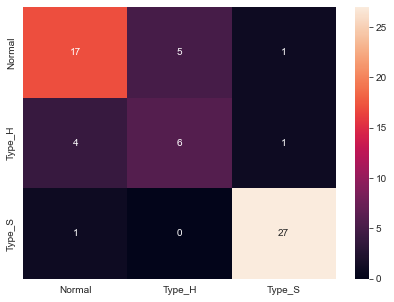

In [50]:
# Confusion Matrix

cm = confusion_matrix(y_test, predicted_labels, labels=[0,1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

**Observations:**
- Our model predicts Type_S correctly most of the time followed by Type_H and Normal
- Misclassification of labels are more when predicting Normal class
- Since training dataset is slightly imbalanced, we can observe the misclassification error on test dataset.

In [51]:
# Total no of datapoints in Class variable
# Normal=0; 100
# Type_H=1; 60
# Type_S=2; 150
print("classification  Matrix:\n",classification_report(y_test,predicted_labels))

classification  Matrix:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76        23
           1       0.55      0.55      0.55        11
           2       0.93      0.96      0.95        28

    accuracy                           0.81        62
   macro avg       0.75      0.75      0.75        62
weighted avg       0.80      0.81      0.80        62



**Evaluation metrics allow us to estimate errors to determine how well our models
are performing:**

> Accuracy: ratio of correct predictions over total predictions.

> Precision: how often the classifier is correct when it predicts positive.

> Recall: how often the classifier is correct for all positive instances.

> F-Score: single measurement to combine precision and recall.

**Observations:**
- Class 0 predicted correctly for 77% of time. On similar lines for class 1 55% and class 2 93%.
- Using F1 Score: Precision and Recall is balanced for class 0 by 76% and for class 1 by 55%.
- Precision, Recall, and F1 Score are highest for class 2 followed by class 0 and class 1.
- We have maximum F1 score for class 2, and minimum for class 1.

In [52]:
knn

KNeighborsClassifier(metric='euclidean')

## 5. Performance Improvement:

**Strategy for Performance Improvement:**
1. Using different Scaling methods over dataset.
2. Using automated search for hyper-parameters.
3. Using manual search for hyper-parameters.
4. Model Selection approach with Scaling.
5. Model Selection approach without Scaling.

### 5A. Experiment with various parameters to improve performance of the base model.
(Optional: Experiment with various Hyperparameters - Research required)

#### 1. Using different Scaling methods over dataset.

In [53]:
# Create copy of dataset.
dfa_model = dfa.copy()

# Rescaling features matrix using various scaling methods:
# scaler = RobustScaler()
# scaler = MinMaxScaler()
scaler = StandardScaler()

features = [['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']]
for feature in features:
    dfa_model[feature] = scaler.fit_transform(dfa_model[feature])
    
#Create KNN Object
knn = KNeighborsClassifier()

#Create x and y variable
X = dfa_model.drop(columns=['Class'])
y = dfa_model['Class']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#Training the model
knn.fit(X_train, y_train)

#Predict testing set
y_pred = knn.predict(X_test)

#Check performance using accuracy
print('Accuracy on Training data:',knn.score(X_train, y_train) )
print('Accuracy on Test data:',knn.score(X_test, y_test))

# Detailed Classification Report
print("classification  Matrix:\n",classification_report(y_test,y_pred))

Accuracy on Training data: 0.875
Accuracy on Test data: 0.8387096774193549
classification  Matrix:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.64      0.64      0.64        11
           2       0.96      0.96      0.96        28

    accuracy                           0.84        62
   macro avg       0.79      0.79      0.79        62
weighted avg       0.84      0.84      0.84        62



In [54]:
knn

KNeighborsClassifier()

**Case-1 Observations:**
- Accuracy improvement by 3% over base model.
- Some Good improvements in Class precision.

#### 2. Using automated search for hyper-parameters.

In [55]:
# Build and train the model
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
# Exhaustive search over specified parameter values for an estimator.
# Important members are fit, predict.

# GridSearchCV implements a "fit" and a "score" method.
# It also implements "score_samples", "predict", "predict_proba",
# "decision_function", "transform" and "inverse_transform" if they are
# implemented in the estimator used.

# The parameters of the estimator used to apply these methods are optimized
# by cross-validated grid-search over a parameter grid.

grid_params = { 'n_neighbors' : [1,3,5,7,9,11,13,15,17,19],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(knn, grid_params, cv=10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']})

In [57]:
gs.cv_results_['params']

[{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}

In [58]:
gs.best_params_

{'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}

In [59]:
gs.cv_results_['mean_test_score']

array([0.79816667, 0.79816667, 0.81      , 0.814     , 0.79416667,
       0.82616667, 0.79433333, 0.82233333, 0.79833333, 0.8065    ,
       0.7985    , 0.79866667, 0.8105    , 0.81466667, 0.7985    ,
       0.80266667, 0.7825    , 0.79066667, 0.7865    , 0.79866667,
       0.79816667, 0.79816667, 0.81      , 0.814     , 0.79416667,
       0.82616667, 0.79433333, 0.82233333, 0.79833333, 0.8065    ,
       0.7985    , 0.79866667, 0.8105    , 0.81466667, 0.7985    ,
       0.80266667, 0.7825    , 0.79066667, 0.7865    , 0.79866667,
       0.79383333, 0.79383333, 0.76983333, 0.782     , 0.7945    ,
       0.8185    , 0.78666667, 0.79866667, 0.77866667, 0.78683333,
       0.77433333, 0.7825    , 0.811     , 0.819     , 0.81866667,
       0.81483333, 0.79866667, 0.79866667, 0.79866667, 0.81083333])

In [60]:
# Lets Build knn with best params

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='distance')

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [61]:
#Check performance using accuracy
print('Accuracy on Training data:',knn.score(X_train, y_train))
print('Accuracy on Test data:',knn.score(X_test, y_test))

# Detailed Classification Report
print("classification  Matrix:\n",classification_report(y_test,y_pred))

Accuracy on Training data: 1.0
Accuracy on Test data: 0.8387096774193549
classification  Matrix:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        23
           1       0.64      0.64      0.64        11
           2       0.96      0.96      0.96        28

    accuracy                           0.84        62
   macro avg       0.79      0.79      0.79        62
weighted avg       0.84      0.84      0.84        62



In [62]:
knn

KNeighborsClassifier(weights='distance')

**Case-2 Observations:**
- 100% accuracy in training: Shows presence of huge overfittng in model.
- Manual search for hyperparametes would be a good choice.
- Accuracy improvement by 3% over base model.
- Good improvements in Class precision.

#### 3. Using manual search for hyper-parameters.

In [63]:
# Optimize the value of k

train_score=[]
test_score=[]
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

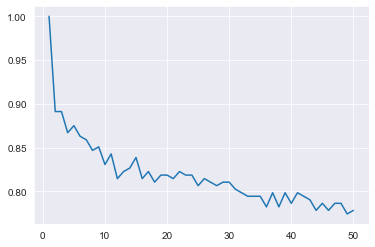

In [64]:
# train_score vs. k

plt.plot(range(1,51),train_score)
plt.show()

# Here training accuracy decreases as k increases

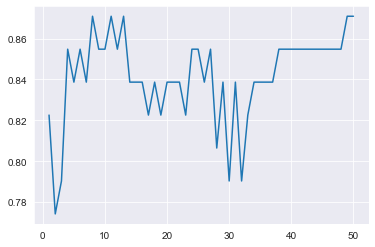

In [65]:
# test_score vs. k

plt.plot(range(1,51),test_score)
plt.show()

# The accuracy is maximum when k is less than 50. So we can cap the value of k as less than 50.

In [66]:
# Check the performance of model for various k values; Consider the k upto 50
# Build knn with k neighbors

k=[1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,knn.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,knn.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,y_pred))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.8225806451612904:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77        23
           1       0.70      0.64      0.67        11
           2       0.93      0.93      0.93        28

    accuracy                           0.82        62
   macro avg       0.79      0.78      0.79        62
weighted avg       0.82      0.82      0.82        62

Accuracy on Training data for k 3 is 0.8911290322580645:
Accuracy on Test data for k 3 is 0.7903225806451613:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.73      0.70      0.71        23
           1       0.54      0.64      0.58        11
           2       0.96      0.93      0.95        28

    accuracy                           0.79        62
   macro avg       0.74      0.75      0.75        62
weighted avg       0.80      0.79     

Accuracy on Test data for k 45 is 0.8548387096774194:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        23
           1       0.75      0.55      0.63        11
           2       0.93      0.96      0.95        28

    accuracy                           0.85        62
   macro avg       0.83      0.79      0.80        62
weighted avg       0.85      0.85      0.85        62

Accuracy on Training data for k 47 is 0.7862903225806451:
Accuracy on Test data for k 47 is 0.8548387096774194:
classification  Matrix:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        23
           1       0.75      0.55      0.63        11
           2       0.93      0.96      0.95        28

    accuracy                           0.85        62
   macro avg       0.83      0.79      0.80        62
weighted avg       0.85      0.85      0.85        62

Accuracy on Training d

In [67]:
# For k=9, we can see a model with good overall performance metrics
# Lets Build knn with k=9, metric='euclidean' and weights='uniform'

knn = KNeighborsClassifier(n_neighbors=9, metric = 'euclidean')

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [68]:
#Check performance using accuracy
print('Accuracy on Training data:',knn.score(X_train, y_train))
print('Accuracy on Test data:',knn.score(X_test, y_test))

# Detailed Classification Report
print("classification  Matrix:\n",classification_report(y_test,y_pred))

Accuracy on Training data: 0.8508064516129032
Accuracy on Test data: 0.8548387096774194
classification  Matrix:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.67      0.73      0.70        11
           2       0.96      0.96      0.96        28

    accuracy                           0.85        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.86      0.85      0.86        62



**Case-3 Observations:**
- For k = 9, we can see a good model at corresponding train and test accuracies of 85.0% and 85.4%.
- Accuracy improvement by 4% over base model.
- Very Good improvements in Class precision, recall and F1 Scores.

#### 4. Model Selection approach with Scaling.

In [69]:
# Use K-Fold Cross Validation for model selection
# Define various classification models
LR_model=LogisticRegression()
KNN_model=KNeighborsClassifier(n_neighbors=9)
GN_model=GaussianNB()
svc_model_linear = SVC(kernel='linear',C=1,gamma=.6)
svc_model_rbf = SVC(kernel='rbf',degree=2,C=.009)
svc_model_poly  = SVC(kernel='poly',degree=2,gamma=0.1,C=.01)

LR: 0.854839 (0.046187)
KNN: 0.803226 (0.052907)
NB: 0.829032 (0.055966)
SVM-linear: 0.858065 (0.056244)
SVM-poly: 0.483871 (0.079016)
SVM-rbf: 0.483871 (0.079016)


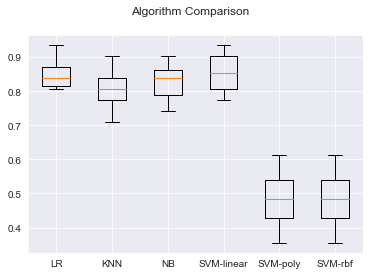

In [70]:
# With Standard Scaler

seed = 0

# Create models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model,X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
# Boxplot for algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Case-4 Observations:**
- Accuracy is high for LR, NB and SVM-linear models. However the standard deviation is less for LR model.
- LR is a better algorithm for this dataset because of high accuracy and less Standard deviation.

#### 5. Model Selection approach without Scaling.

LR: 0.809677 (0.065238)
KNN: 0.841935 (0.060263)
NB: 0.829032 (0.055966)
SVM-linear: 0.858065 (0.059830)
SVM-poly: 0.819355 (0.038710)
SVM-rbf: 0.483871 (0.079016)


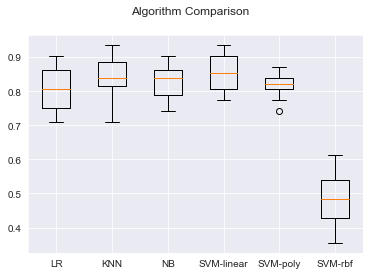

In [71]:
# Without Standard Scaler

# Split X and y into training and test set in 80:20 ratio
dfa = dfa.copy()
X=dfa.drop(columns='Class')
y=dfa['Class'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

seed = 0

# Create models
models = []
models.append(('LR', LR_model))
models.append(('KNN', KNN_model))
models.append(('NB', GN_model))
models.append(('SVM-linear', svc_model_linear))
models.append(('SVM-poly', svc_model_poly))
models.append(('SVM-rbf', svc_model_rbf))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model,X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Boxplot for algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Case-5 Observations:**
- Accuracy is high for LR, KNN, NB, SVM-linear, and SVM-poly models. However the standard deviation is less for SVM-ploy model.
- Here SVM-linear is a better algorithm for this dataset because of high accuracy and some Standard deviation.

### 5B. Clearly showcase improvement in performance achieved.
For Example:
- A. Accuracy: +15% improvement
- B. Precision: +10% improvement.

**Observations:**
1. We can increase the Accuracy by 4% compared to the base model.
2. We can increase the Precision for Class-0, 1 and 2 by 5%, 12% and 3%.
3. We can increase the Recall for Class-0, 1 by 4%, 18%.
4. We can increase the F1 Score for Class-0, 1 and 2 by 4%, 15% and 1%.
5. SVM-linear is also a better algorithm for this dataset because of high accuracy and low Standard deviation.
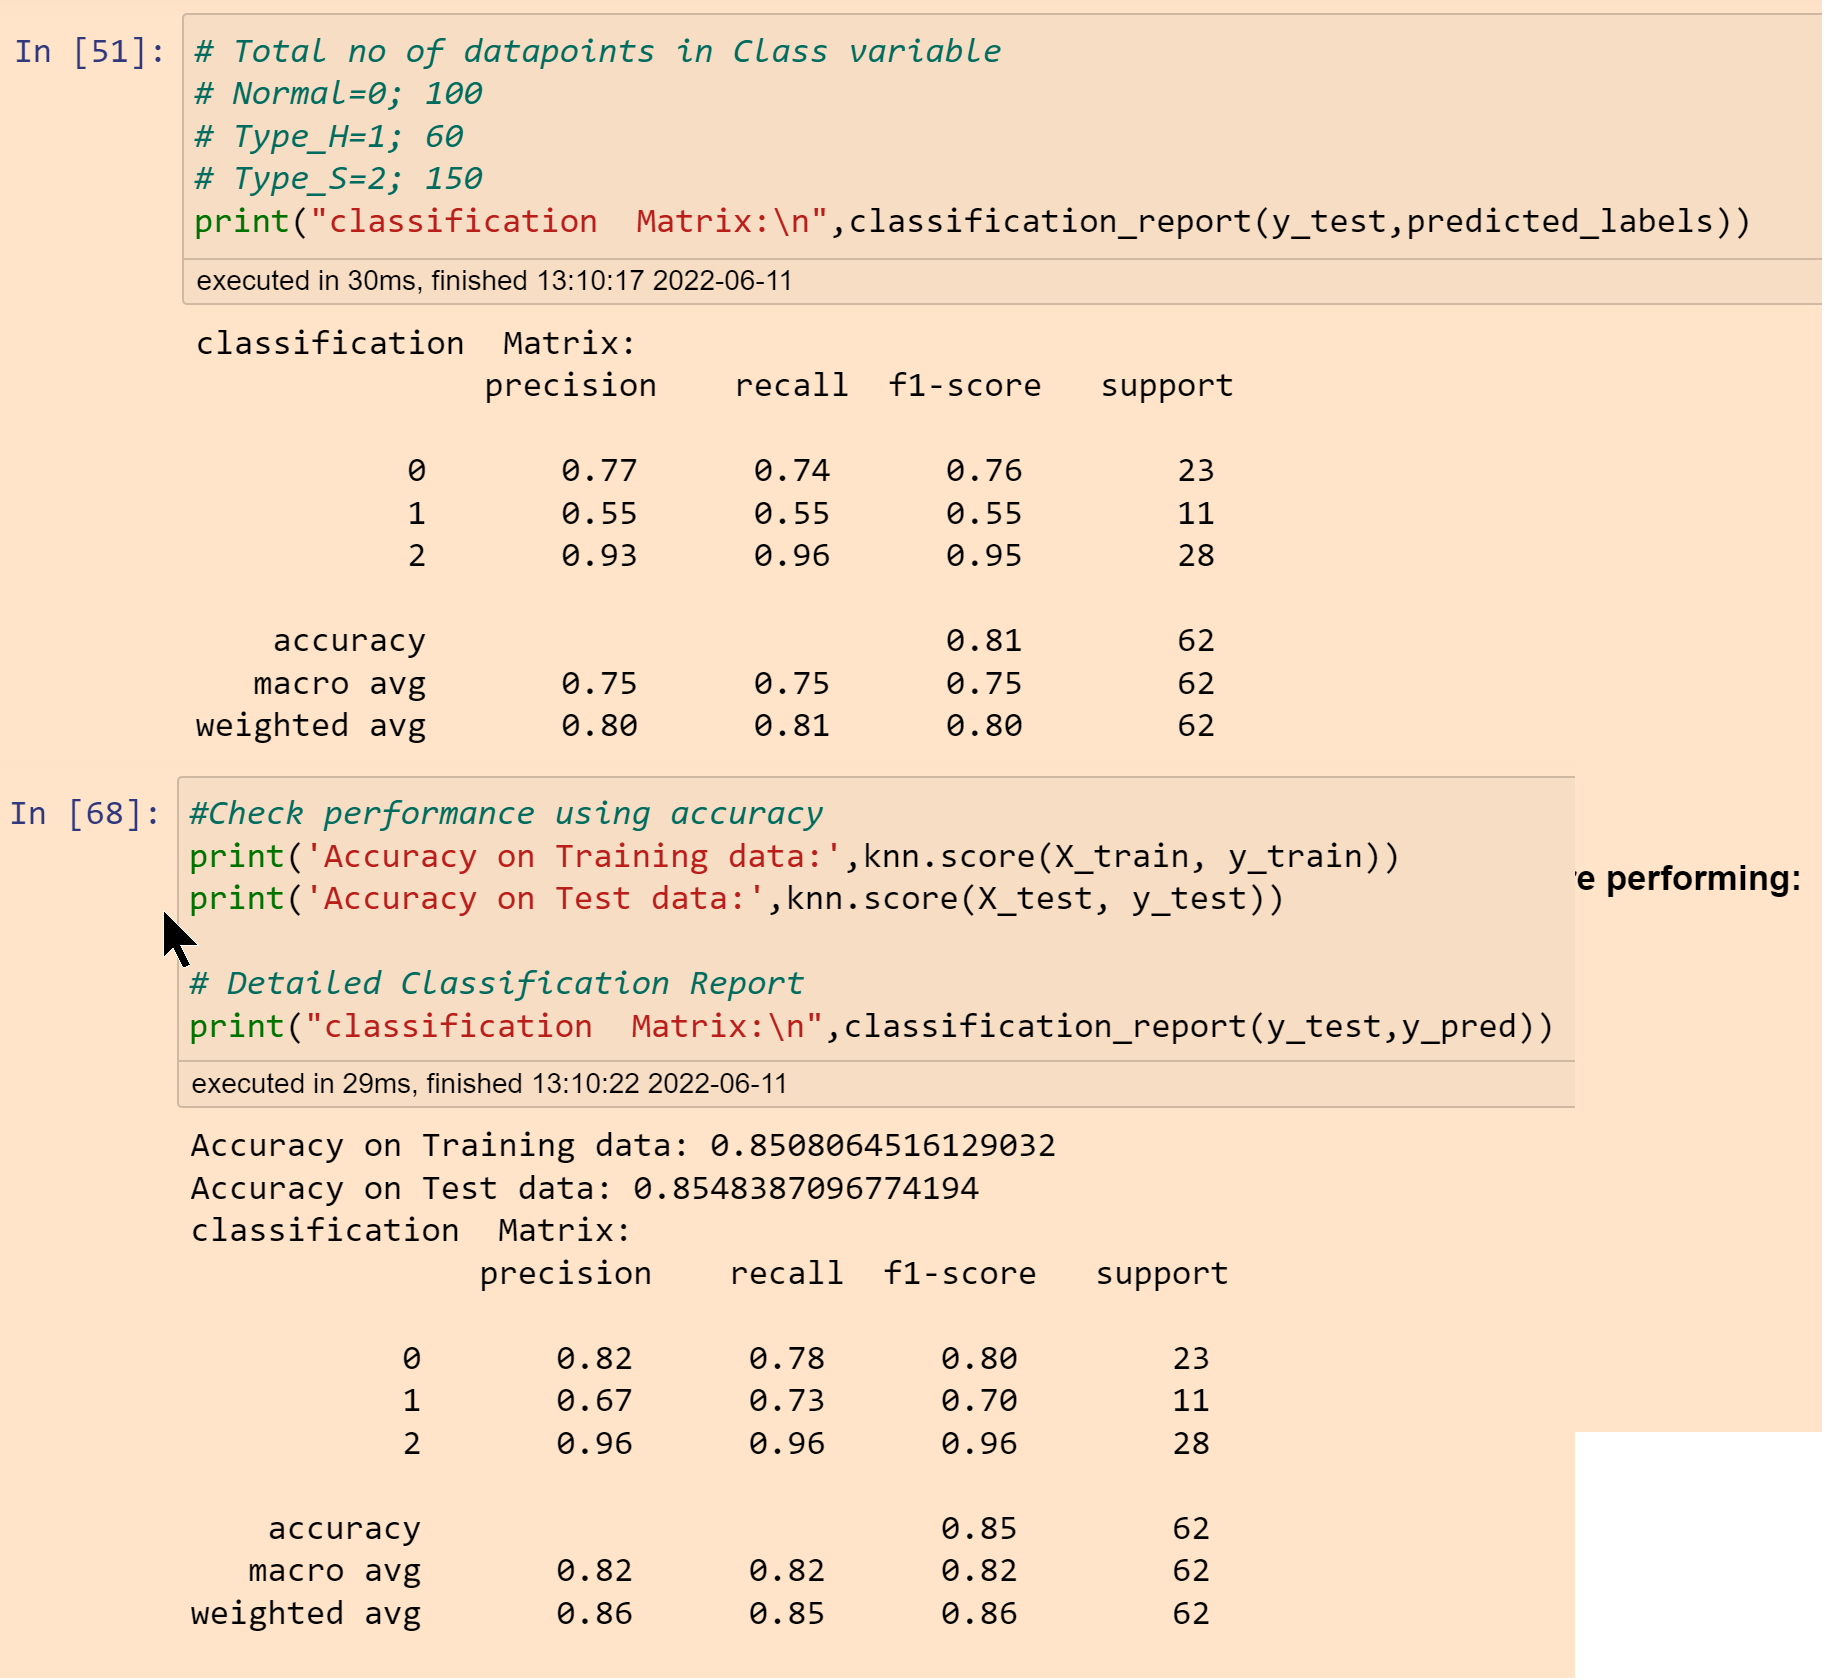

### 5C. Clearly state which parameters contributed most to improve model performance.

**Important parameters and methods:**
1. Number of neighbors; k=9.
2. The distance metric to use for modeling; metric = 'euclidean'.
3. Scaling method used for dataset; scaler = StandardScaler().
4. K-Fold cross validation approach for model selection.
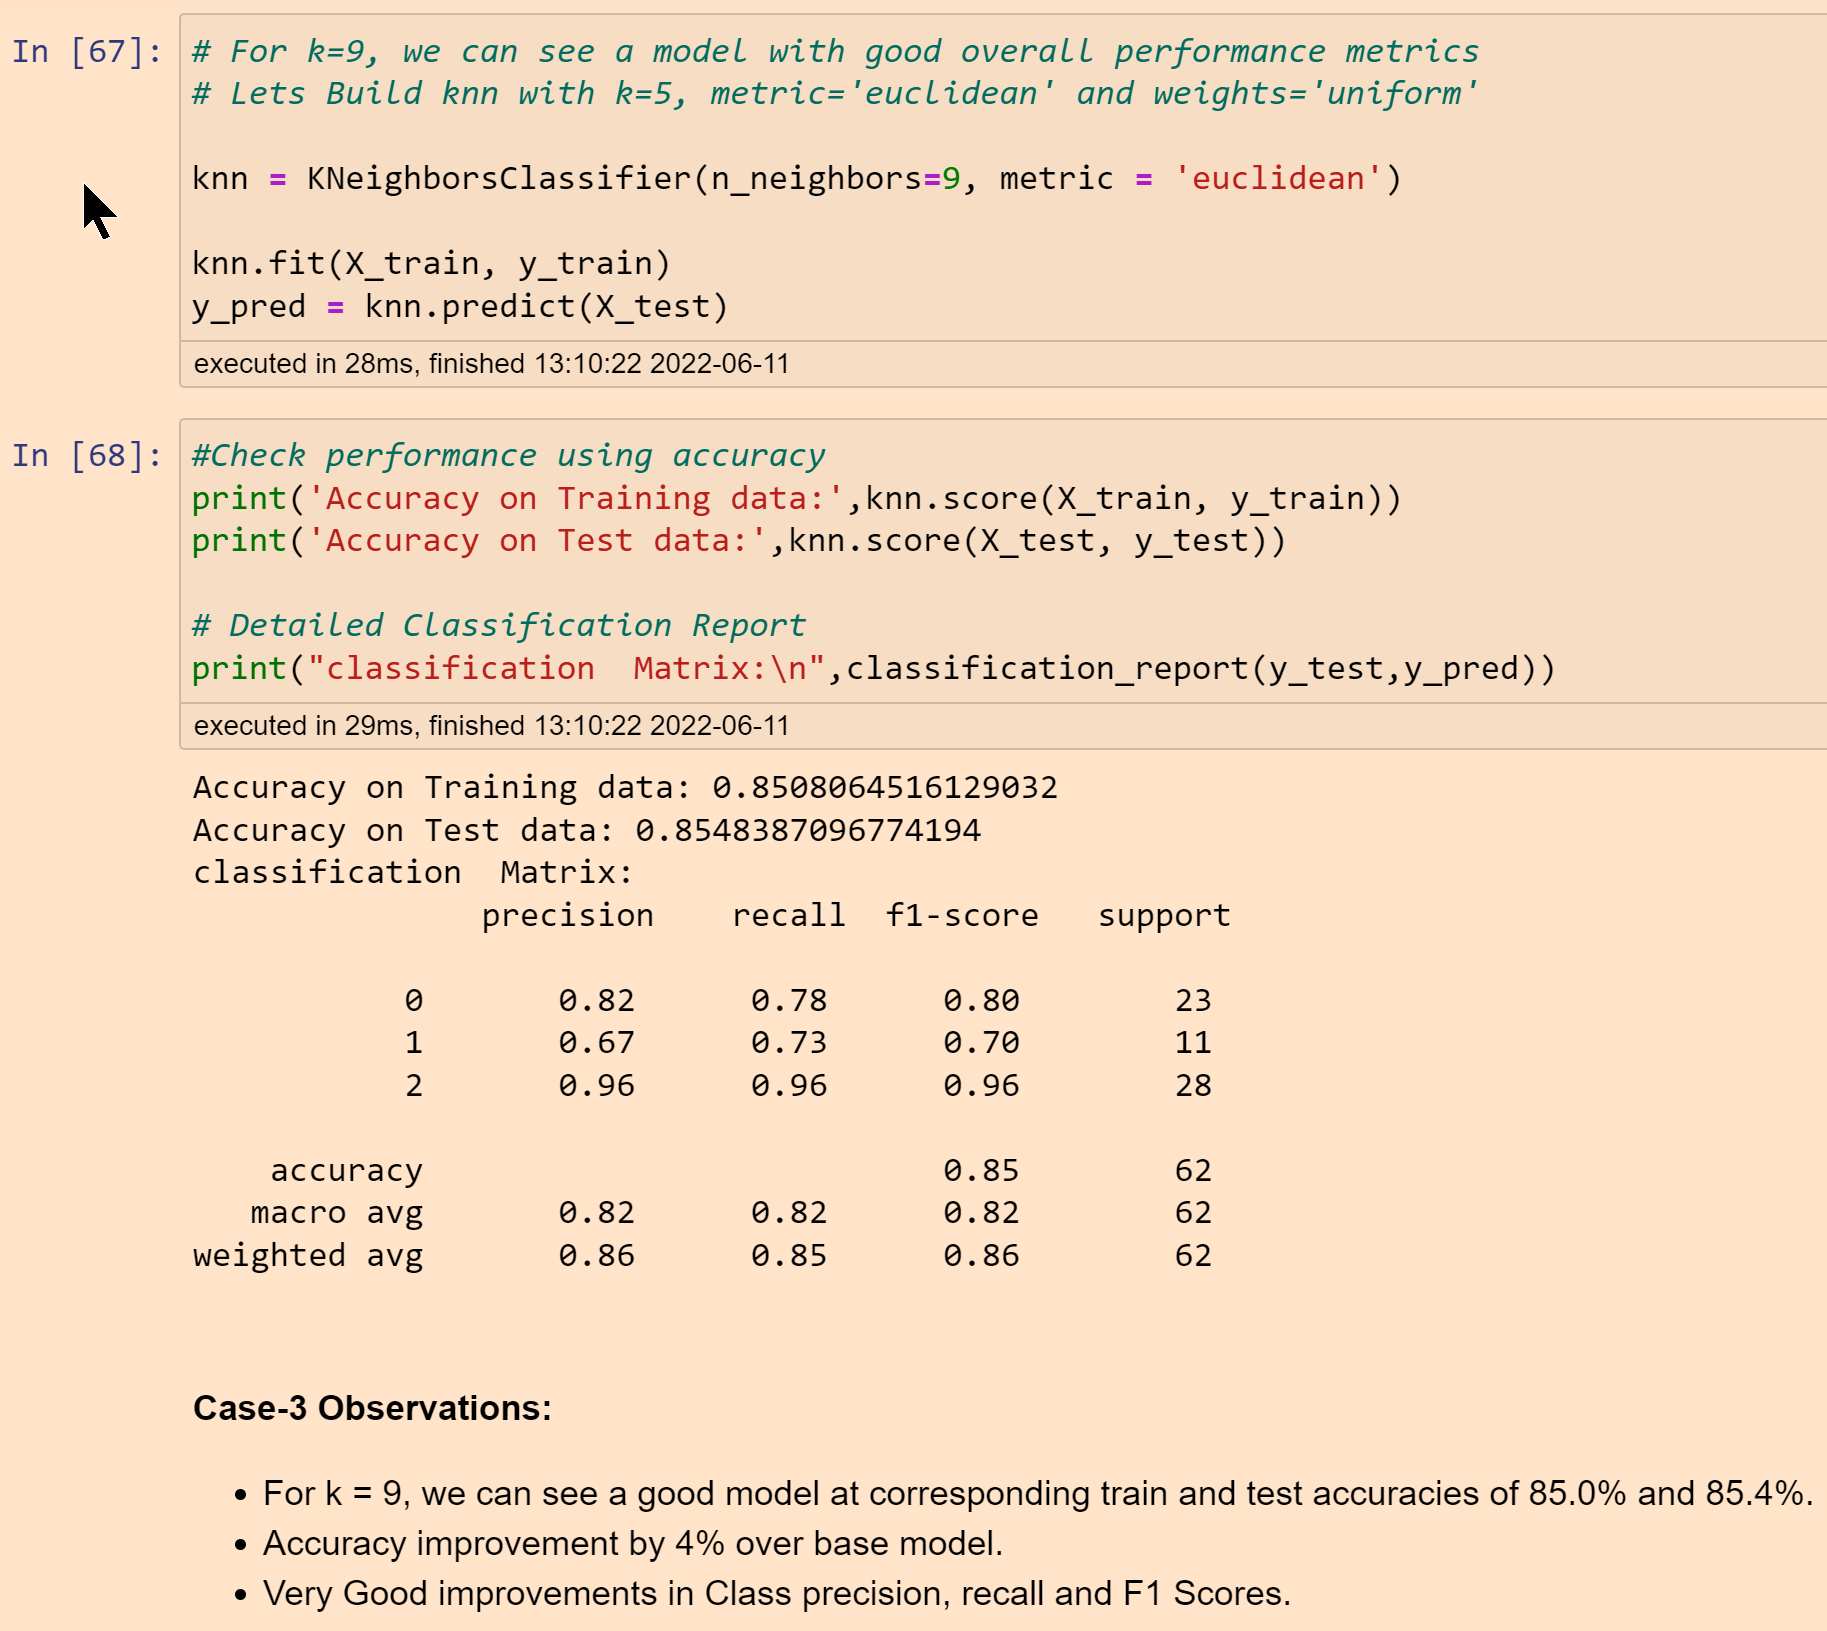

# Part-B: Solution

- **DOMAIN:** Banking, Marketing
- **CONTEXT:** A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.
- **DATA DESCRIPTION:**
    1. Team: Team’s name
    2. ID: Customer ID
    3. Age: Customer’s approximate age.
    4. CustomerSince: Customer of the bank since. [unit is masked]
    5. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
    6. ZipCode: Customer’s zip code.
    7. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
    8. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
    9. Level: A level associated to the customer which is masked by the bank as an IP.
    10. Mortgage: Customer’s mortgage. [unit is masked]
    11. Security: Customer’s security asset with the bank. [unit is masked]
    12. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
    13. InternetBanking: if the customer uses internet banking.
    14. CreditCard: if the customer uses bank’s credit card.
    15. LoanOnCard: if the customer has a loan on credit card.
- **PROJECT OBJECTIVE:** Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

In [72]:
# Import all the relevant libraries needed to complete the analysis, visualization, modeling and presentation
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline

from scipy import stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

## 1. Data Understanding and Preparation:

### 1A. Read both the Datasets ‘Data1’ and ‘Data2’ as DataFrame and store them into two separate variables.

In [73]:
# Read the CSV File 1 and 2
dfb1=pd.read_csv('Part2+-+Data1.csv')

dfb2=pd.read_csv('Part2+-Data2.csv')

### 1B. Print shape and Column Names and DataTypes of both the Dataframes.

In [74]:
dfb1.shape

(5000, 8)

In [75]:
dfb1.info()
dfb1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

In [76]:
dfb2.shape

(5000, 7)

In [77]:
dfb2.info()
dfb2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

### 1C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

In [78]:
# ID is common in both the dataframes
dfb=dfb1.merge(dfb2, left_on='ID', right_on='ID')

In [79]:
dfb.shape

(5000, 14)

In [80]:
dfb.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

### 1D. Change Datatype of below features to ‘Object’
- ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.
- [Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.]

In [81]:
dfb.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [82]:
# Change the Datatype of categorical features
col=['HiddenScore','Level','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard']
for c in col:
    dfb[c]=dfb[c].astype('category')

In [83]:
dfb.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

**Observations:**
- Final Dataframe has 14 columns and 5000 rows.
- LoanOnCard is the target vector.
- Explore for null/missing values in the attributes and if required drop or impute values.

## 2. Data Exploration and Analysis:

### 2A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights.

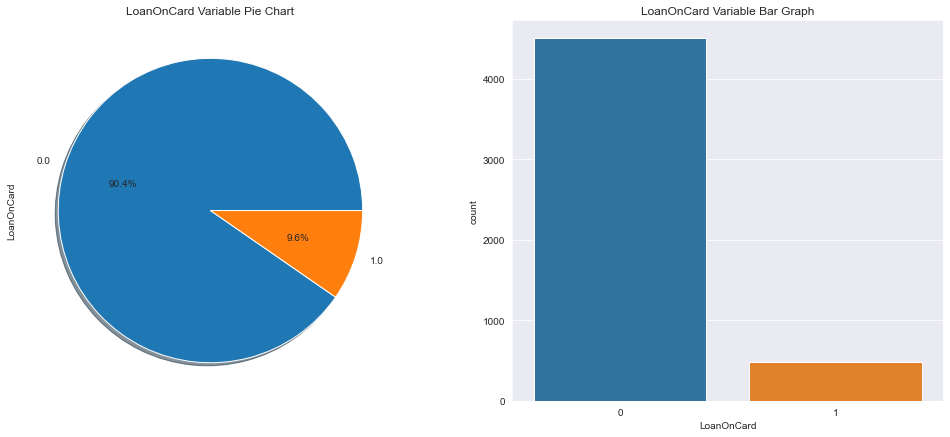

In [84]:
# Creat a side by side Pie and Bar chart
f,axes=plt.subplots(1,2,figsize=(17,7))
dfb['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=dfb,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

**There is huge imbalance in target vector.**

If the imbalanced data is not treated beforehand, then this will degrade the performance of the ML model. Most of the predictions will correspond to the majority class and treat the minority class of features as noise in the data and ignore them. This results in a high bias and low performance of the model.

A widely adopted technique for dealing with highly unbalanced datasets is called re-sampling.

**Two widely used re-sampling methods are:**

- Under-sampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

- Over-sampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class

- Here we will use oversampling because under-sampling may remove important information from the dataset

### 2B. Check the percentage of missing values and impute if required.

In [85]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   Age                  5000 non-null   int64   
 2   CustomerSince        5000 non-null   int64   
 3   HighestSpend         5000 non-null   int64   
 4   ZipCode              5000 non-null   int64   
 5   HiddenScore          5000 non-null   category
 6   MonthlyAverageSpend  5000 non-null   float64 
 7   Level                5000 non-null   category
 8   Mortgage             5000 non-null   int64   
 9   Security             5000 non-null   category
 10  FixedDepositAccount  5000 non-null   category
 11  InternetBanking      5000 non-null   category
 12  CreditCard           5000 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 347.6 KB


In [86]:
# Percentage of missing values

# dfb.isnull().sum()
# dfb.isna().sum()

def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(dfb)

Total  Percent
LoanOnCard              20    0.004
ID                       0    0.000
Age                      0    0.000
CustomerSince            0    0.000
HighestSpend             0    0.000
ZipCode                  0    0.000
HiddenScore              0    0.000
MonthlyAverageSpend      0    0.000
Level                    0    0.000
Mortgage                 0    0.000
Security                 0    0.000
FixedDepositAccount      0    0.000
InternetBanking          0    0.000
CreditCard               0    0.000

In [87]:
# Target variable LoanOnCard have few missing records.
# As missing values are small, we can safely drop the missing records.
dfb.dropna(axis=0,inplace=True)

In [88]:
# All the missing records are dropped
dfb.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

### 2C. Check for unexpected values in each categorical variable and impute with best suitable value.
[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment ]

In [89]:
# Get a list of categories of categorical variable
# col=['HiddenScore','Level','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard']
print(dfb.HiddenScore.value_counts())
print(dfb.Level.value_counts())
print(dfb.Security.value_counts())
print(dfb.FixedDepositAccount.value_counts())
print(dfb.InternetBanking.value_counts())
print(dfb.CreditCard.value_counts())
print(dfb.LoanOnCard.value_counts())

1    1466
2    1293
4    1215
3    1006
Name: HiddenScore, dtype: int64
1    2089
3    1496
2    1395
Name: Level, dtype: int64
0    4460
1     520
Name: Security, dtype: int64
0    4678
1     302
Name: FixedDepositAccount, dtype: int64
1    2974
0    2006
Name: InternetBanking, dtype: int64
0    3514
1    1466
Name: CreditCard, dtype: int64
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [90]:
dfb[col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   HiddenScore          4980 non-null   category
 1   Level                4980 non-null   category
 2   Security             4980 non-null   category
 3   FixedDepositAccount  4980 non-null   category
 4   InternetBanking      4980 non-null   category
 5   CreditCard           4980 non-null   category
 6   LoanOnCard           4980 non-null   category
dtypes: category(7)
memory usage: 73.9 KB


**Observations:** The dataset is clean, and we do not have the unexpected values.

### 2D. EDA: Exploratory Data Analysis 
(Concise additional details for model building)

In [91]:
# ID and ZipCode columns are not useful in model building; So we can safely remove them
dfb.drop('ID',axis=1,inplace=True)
dfb.drop('ZipCode',axis=1,inplace=True)

In [92]:
# Dataframe after initial data cleaning
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  4980 non-null   int64   
 1   CustomerSince        4980 non-null   int64   
 2   HighestSpend         4980 non-null   int64   
 3   HiddenScore          4980 non-null   category
 4   MonthlyAverageSpend  4980 non-null   float64 
 5   Level                4980 non-null   category
 6   Mortgage             4980 non-null   int64   
 7   Security             4980 non-null   category
 8   FixedDepositAccount  4980 non-null   category
 9   InternetBanking      4980 non-null   category
 10  CreditCard           4980 non-null   category
 11  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 268.4 KB


In [93]:
# Data Summary for numerical features
dfb.describe()

Age  CustomerSince  HighestSpend  MonthlyAverageSpend  \
count  4980.000000    4980.000000    4980.00000          4980.000000   
mean     45.352610      20.117671      73.85241             1.939536   
std      11.464212      11.468716      46.07009             1.750006   
min      23.000000      -3.000000       8.00000             0.000000   
25%      35.000000      10.000000      39.00000             0.700000   
50%      45.000000      20.000000      64.00000             1.500000   
75%      55.000000      30.000000      98.00000             2.525000   
max      67.000000      43.000000     224.00000            10.000000   

          Mortgage  
count  4980.000000  
mean     56.589759  
std     101.836758  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%     101.000000  
max     635.000000

In [94]:
# Data Summary for categorical features
# col=['HiddenScore','Level','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard']

dfb[col].describe()

HiddenScore  Level  Security  FixedDepositAccount  InternetBanking  \
count          4980   4980      4980                 4980             4980   
unique            4      3         2                    2                2   
top               1      1         0                    0                1   
freq           1466   2089      4460                 4678             2974   

        CreditCard  LoanOnCard  
count         4980      4980.0  
unique           2         2.0  
top              0         0.0  
freq          3514      4500.0

#### Distribution and outlier analysis of numerical features

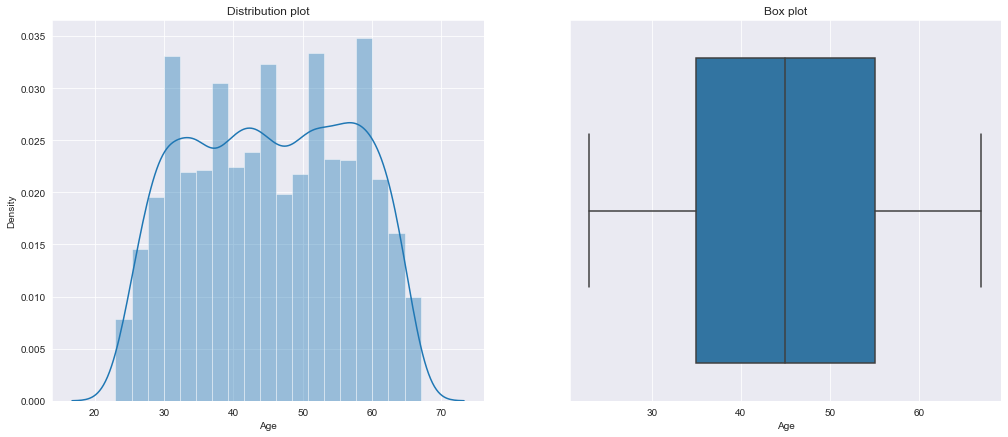

 Total Number of outliers in Age: 0


In [95]:
# Age

# Distribution and box plot
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Age', data=dfb,  orient='h', ax=axes[1])
sns.distplot(dfb['Age'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

# Outlier detection
q25,q75=np.percentile(dfb['Age'],25),np.percentile(dfb['Age'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfb['Age'] if i < lower or i > upper]
print('{} Total Number of outliers in Age: {}'.format('\033[1m',len(Outliers)))

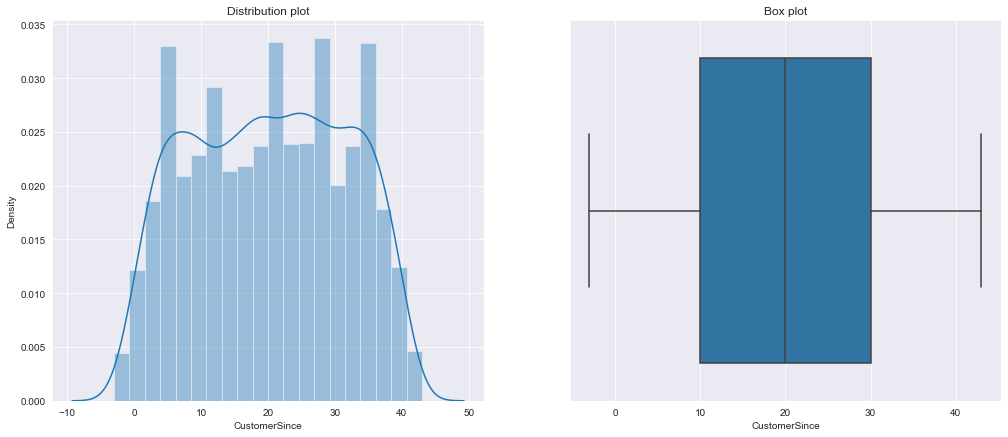

 Total Number of outliers in CustomerSince: 0


In [96]:
# CustomerSince

# Distribution and box plot
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'CustomerSince', data=dfb,  orient='h' , ax=axes[1])
sns.distplot(dfb['CustomerSince'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

# Outlier detection
q25,q75=np.percentile(dfb['CustomerSince'],25),np.percentile(dfb['CustomerSince'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfb['CustomerSince'] if i < lower or i > upper]
print('{} Total Number of outliers in CustomerSince: {}'.format('\033[1m',len(Outliers)))

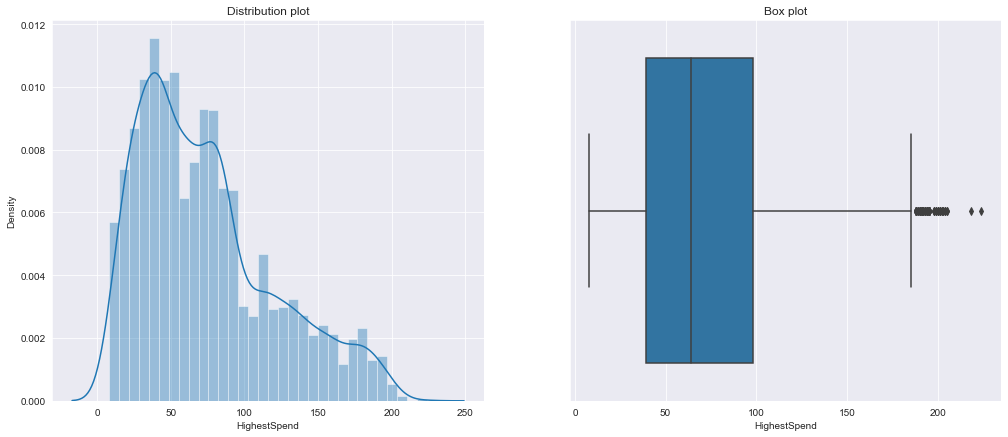

 Total Number of outliers in HighestSpend: 96


In [97]:
# HighestSpend

# Distribution and box plot
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'HighestSpend', data=dfb,  orient='h', ax=axes[1])
sns.distplot(dfb['HighestSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

# Outlier detection
q25,q75=np.percentile(dfb['HighestSpend'],25),np.percentile(dfb['HighestSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfb['HighestSpend'] if i < lower or i > upper]
print('{} Total Number of outliers in HighestSpend: {}'.format('\033[1m',len(Outliers)))

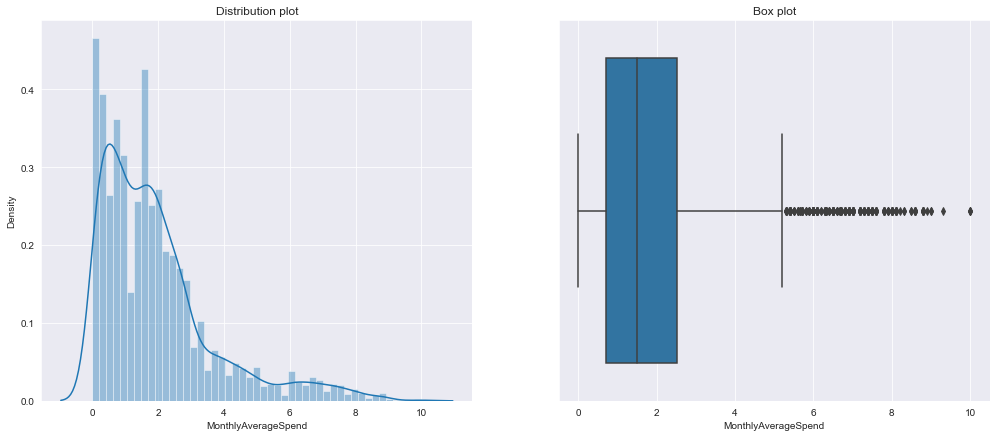

 Total Number of outliers in MonthlyAverageSpend: 324


In [98]:
# MonthlyAverageSpend

# Distribution and box plot
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'MonthlyAverageSpend', data=dfb,  orient='h' , ax=axes[1])
sns.distplot(dfb['MonthlyAverageSpend'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

# Outlier detection
q25,q75=np.percentile(dfb['MonthlyAverageSpend'],25),np.percentile(dfb['MonthlyAverageSpend'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfb['MonthlyAverageSpend'] if i < lower or i > upper]
print('{} Total Number of outliers in MonthlyAverageSpend: {}'.format('\033[1m',len(Outliers)))

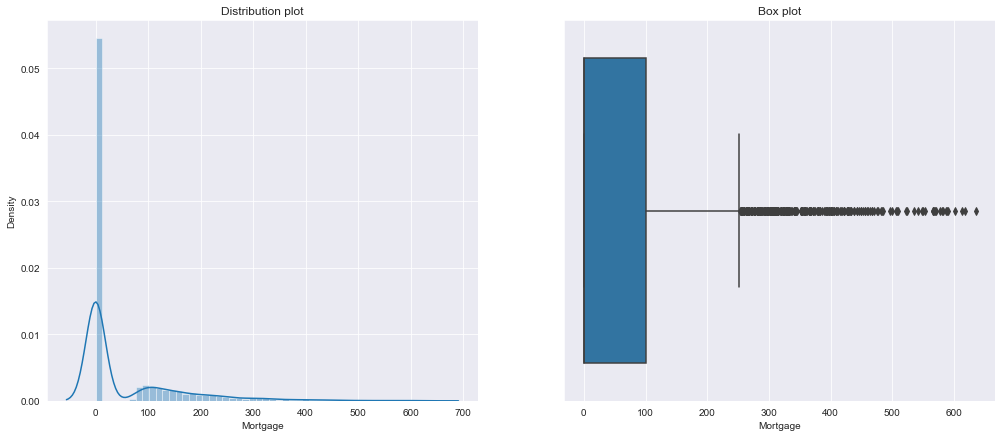

 Total Number of outliers in Mortgage: 291


In [99]:
# Mortgage

# Distribution and box plot
f, axes = plt.subplots(1, 2, figsize=(17,7))
sns.boxplot(x = 'Mortgage', data=dfb,  orient='h' , ax=axes[1])
sns.distplot(dfb['Mortgage'],  ax=axes[0])
axes[0].set_title('Distribution plot')
axes[1].set_title('Box plot')
plt.show()

# Outlier detection
q25,q75=np.percentile(dfb['Mortgage'],25),np.percentile(dfb['Mortgage'],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in dfb['Mortgage'] if i < lower or i > upper]
print('{} Total Number of outliers in Mortgage: {}'.format('\033[1m',len(Outliers)))

#### Distribution of categorical features

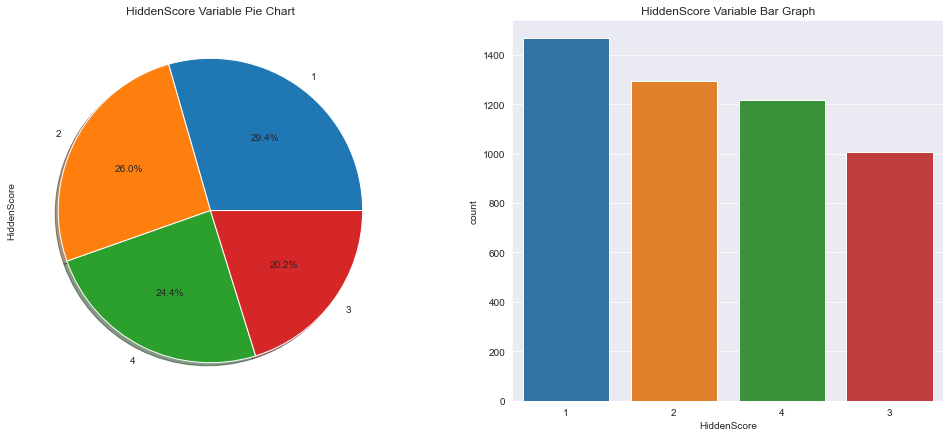

In [100]:
# HiddenScore

f,axes=plt.subplots(1,2,figsize=(17,7))
dfb['HiddenScore'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('HiddenScore',data=dfb,ax=axes[1],order=[1,2,4,3])
axes[0].set_title('HiddenScore Variable Pie Chart')
axes[1].set_title('HiddenScore Variable Bar Graph')
plt.show()

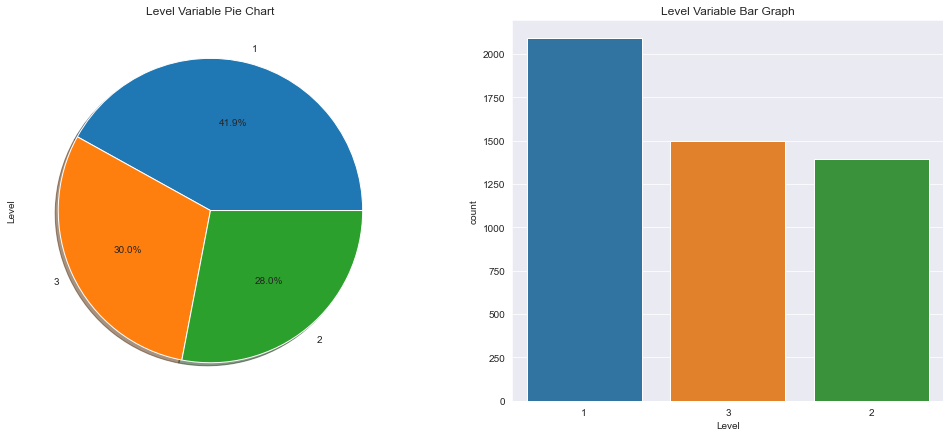

In [101]:
# Level

f,axes=plt.subplots(1,2,figsize=(17,7))
dfb['Level'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Level',data=dfb,ax=axes[1],order=[1,3,2])
axes[0].set_title('Level Variable Pie Chart')
axes[1].set_title('Level Variable Bar Graph')
plt.show()

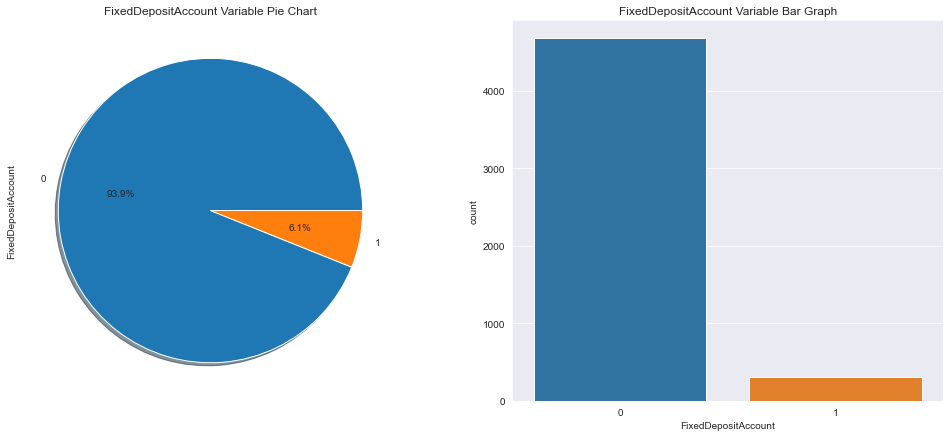

In [102]:
# FixedDepositAccount

f,axes=plt.subplots(1,2,figsize=(17,7))
dfb['FixedDepositAccount'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('FixedDepositAccount',data=dfb,ax=axes[1])
axes[0].set_title('FixedDepositAccount Variable Pie Chart')
axes[1].set_title('FixedDepositAccount Variable Bar Graph')
plt.show()

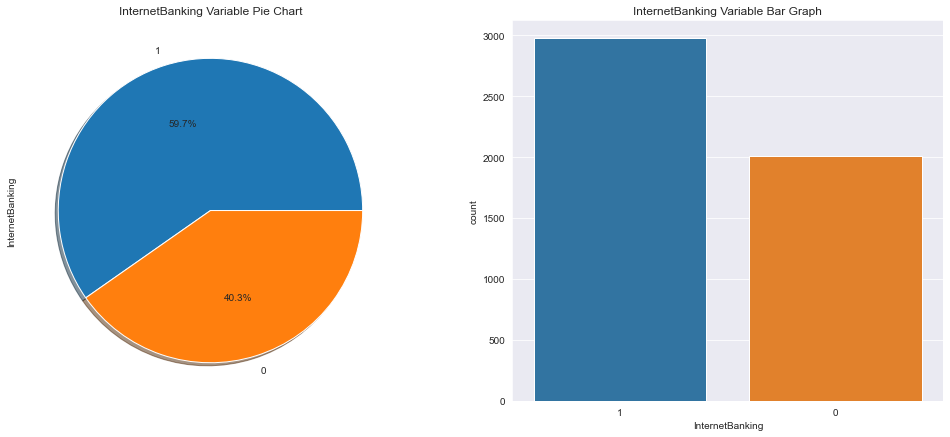

In [103]:
# InternetBanking

f,axes=plt.subplots(1,2,figsize=(17,7))
dfb['InternetBanking'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('InternetBanking',data=dfb,ax=axes[1],order=[1,0])
axes[0].set_title('InternetBanking Variable Pie Chart')
axes[1].set_title('InternetBanking Variable Bar Graph')
plt.show()

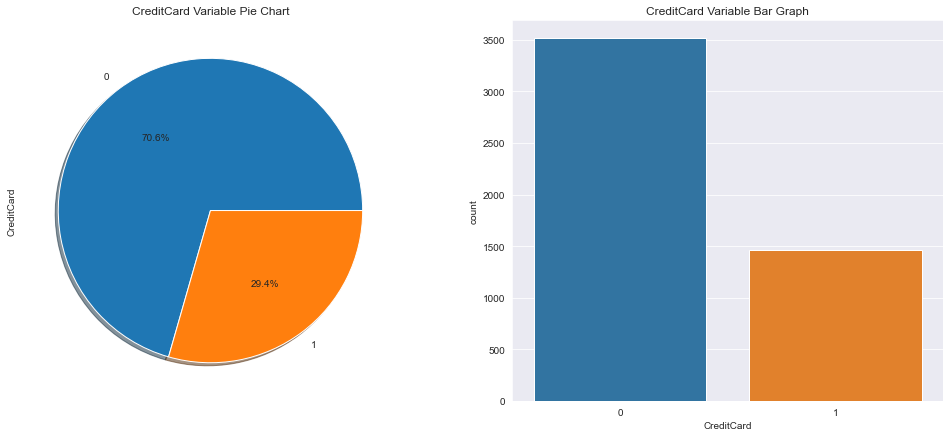

In [104]:
# CreditCard

f,axes=plt.subplots(1,2,figsize=(17,7))
dfb['CreditCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('CreditCard',data=dfb,ax=axes[1],order=[0,1])
axes[0].set_title('CreditCard Variable Pie Chart')
axes[1].set_title('CreditCard Variable Bar Graph')
plt.show()

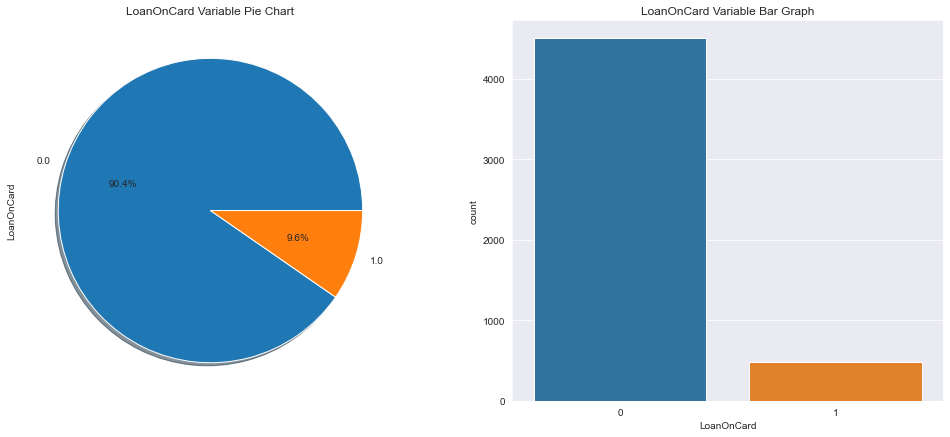

In [105]:
# LoanOnCard

f,axes=plt.subplots(1,2,figsize=(17,7))
dfb['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=dfb,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

#### Check for data imbalance in target vector

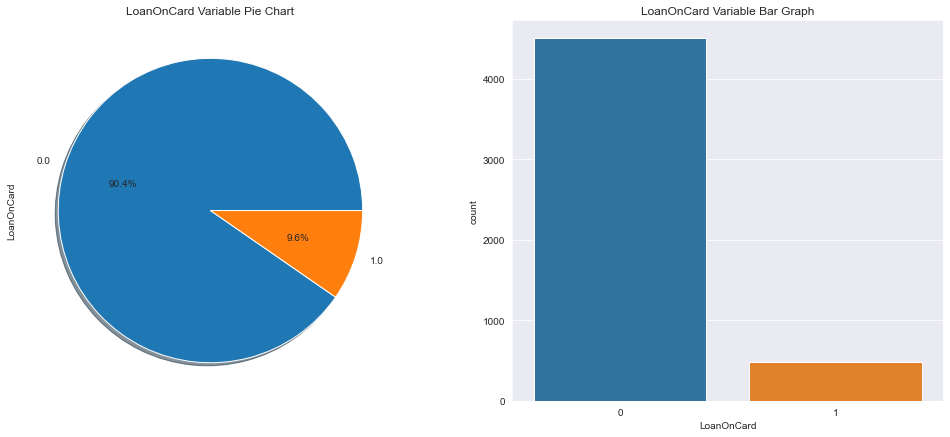

In [106]:
f,axes=plt.subplots(1,2,figsize=(17,7))
dfb['LoanOnCard'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('LoanOnCard',data=dfb,ax=axes[1],order=[0,1])
axes[0].set_title('LoanOnCard Variable Pie Chart')
axes[1].set_title('LoanOnCard Variable Bar Graph')
plt.show()

In [107]:
# Non-Loan Holders:0; Loan Holders:1

dfb.groupby(["LoanOnCard"]).count()

Age  CustomerSince  HighestSpend  HiddenScore  \
LoanOnCard                                                   
0.0         4500           4500          4500         4500   
1.0          480            480           480          480   

            MonthlyAverageSpend  Level  Mortgage  Security  \
LoanOnCard                                                   
0.0                        4500   4500      4500      4500   
1.0                         480    480       480       480   

            FixedDepositAccount  InternetBanking  CreditCard  
LoanOnCard                                                    
0.0                        4500             4500        4500  
1.0                         480              480         480

**Balancing the Target Variable 'LoanOnCard' using SMOTE (Synthetic Minority Over-sampling Technique):**

Imbalanced data is data in which observed frequencies are very different across the different possible values of a categorical variable. Basically, there are many observations of some type and very few of another type.

SMOTE is a solution when we have imbalanced data.

#### Visualize a heatmap to understand correlation between all features

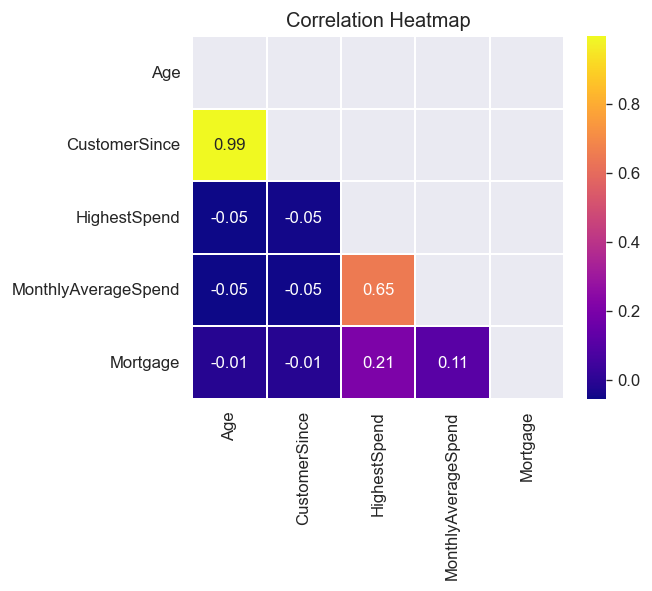

In [108]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(dfb.corr()))
sns.heatmap(dfb.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

#### Visualize a pairplot with 2 classes distinguished by colors

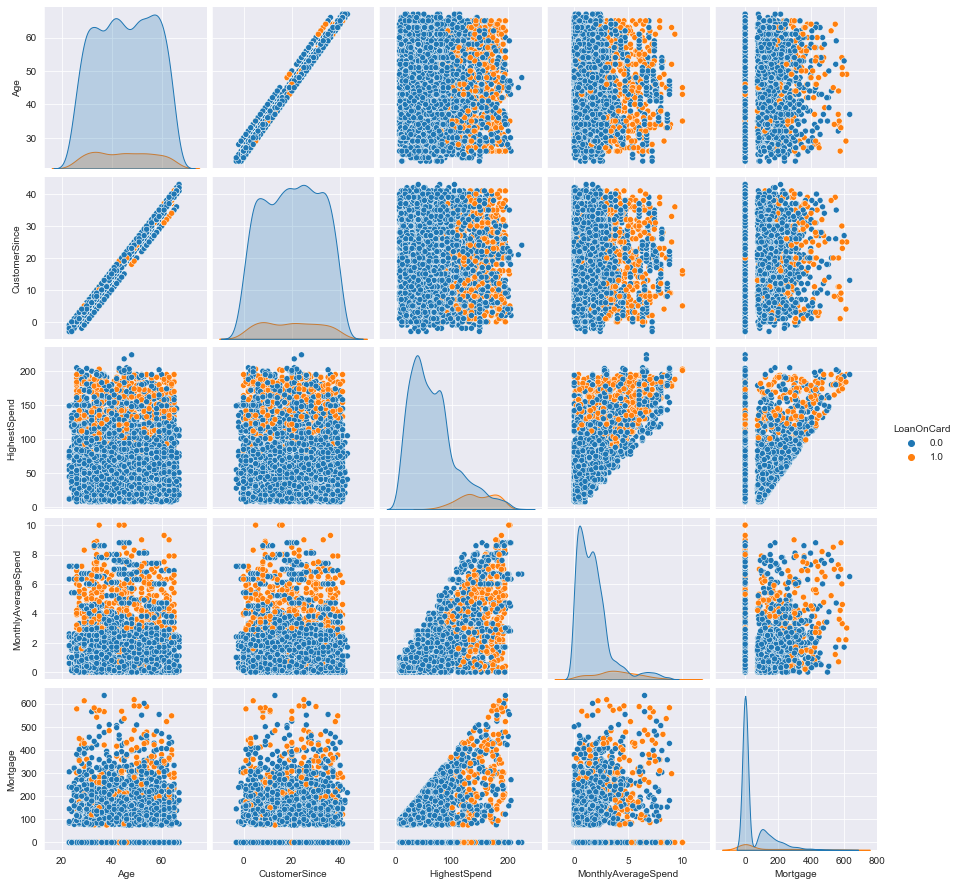

In [109]:
sns.pairplot(dfb,hue='LoanOnCard')

**Observations:**
- There is no strong relation between features and target variable.
- Age and CustomerSince are linearly related.
- There is some relation between HighestSpend and MonthlyAverageSpend.
- HighestSpend has a better correlation with LoanOnCard, a moderate correlation with FixedDepositAmount and MonthlyAverageSpend.
- The features HiddenScore, Level, Mortgage, Security,InternetBanking has very low impact and do not reveal much of the information, hence can be dropped.

#### Test for significance of features

In [110]:
# List of Numerical Features
col_num = ['Age', 'CustomerSince', 'HighestSpend', 'MonthlyAverageSpend', 'Mortgage']

# List of Categorical Features
col_cat = ['HiddenScore', 'Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard']

In [111]:
# Understand the mean values of target vector for all the Numerical Features
class_summary=dfb.groupby('LoanOnCard')
class_summary.mean().reset_index()

LoanOnCard        Age  CustomerSince  HighestSpend  MonthlyAverageSpend  \
0        0.0  45.383111      20.146889     66.290444             1.729849   
1        1.0  45.066667      19.843750    144.745833             3.905354   

     Mortgage  
0   51.869111  
1  100.845833

In [112]:
# Hypotheis Testing of continuous features with target vector

# Ho(Null Hypothesis):There is no significant difference in numerical features with different category of Target vector
# Ha(Alternate Hypothesis):There is significant difference in numerical features with different category of Target vector

# Use t test
for i in col_num:
    x = np.array(dfb[dfb.LoanOnCard == 0][i]) 
    y = np.array(dfb[dfb.LoanOnCard == 1][i])
    t, p_value  = stats.ttest_ind(x, y, axis = 0, equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting significance level at 5%
        print('{} Reject Null Hypothesis. {} of Loan holders and Non-Loan holders are not same.'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis. {} of Loan holders and Non-Loan holders are same.'.format('\033[1m',i))
    print('\n')

 P_Value:0.5694160158774422
 Fail to Reject Null Hypothesis. Age of Loan holders and Non-Loan holders are same.


 P_Value:0.5855242526574542
 Fail to Reject Null Hypothesis. CustomerSince of Loan holders and Non-Loan holders are same.


 P_Value:1.527529731162187e-227
 Reject Null Hypothesis. HighestSpend of Loan holders and Non-Loan holders are not same.


 P_Value:2.414409993123105e-77
 Reject Null Hypothesis. MonthlyAverageSpend of Loan holders and Non-Loan holders are not same.


 P_Value:1.3389598194359617e-10
 Reject Null Hypothesis. Mortgage of Loan holders and Non-Loan holders are not same.




**Observations:**
- Age and CustomerSince features does not have effect on target variable.
- Dropping of these columns can be considered during model building.

In [113]:
# Hypotheis Testing of categorcal features with target vector

# Ho(Null Hypothesis):There is no significant difference in categorical features with different category of Target vector
# Ha(Alternate Hypothesis):There is significant difference in categorical features with different category of Target vector

for i in col_cat:
    crosstab=pd.crosstab(dfb['LoanOnCard'],dfb[i])
    chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
    print('{} P_Value:{}'.format('\033[1m',p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
        print('{} Reject Null Hypothesis. There is significant difference in {} Feature for different category of target variable.'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.There is no significant difference in {} Feature for different category of target variable.'.format('\033[1m',i))
    print('\n')

 P_Value:1.5107064617649127e-06
 Reject Null Hypothesis. There is significant difference in HiddenScore Feature for different category of target variable.


 P_Value:6.123126393086782e-25
 Reject Null Hypothesis. There is significant difference in Level Feature for different category of target variable.


 P_Value:0.14081888843711285
 Fail to Reject Null Hypothesis.There is no significant difference in Security Feature for different category of target variable.


 P_Value:2.8419681700339666e-109
 Reject Null Hypothesis. There is significant difference in FixedDepositAccount Feature for different category of target variable.


 P_Value:0.7062815708093111
 Fail to Reject Null Hypothesis.There is no significant difference in InternetBanking Feature for different category of target variable.


 P_Value:0.8994965480984771
 Fail to Reject Null Hypothesis.There is no significant difference in CreditCard Feature for different category of target variable.




**Observations:**

- Security, InternetBanking and CreditCard features does not have effect on target variable.
- Dropping of these columns can be considered during model building.

## 3. Data Preparation and Model Building

In [114]:
# Impute outliers with mean
col=['HighestSpend','MonthlyAverageSpend','Mortgage']

for c in col:
    # Use the IQR method
    q25,q75=np.percentile(dfb[c],25),np.percentile(dfb[c],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in dfb[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} Before Imputing : {}'.format('\033[1m',c,len(Outliers)))
    # Mean of the column without considering the outliers
    dfb_include = dfb.loc[(dfb[c] >= lower) & (dfb[c] <= upper)]
    mean=int(dfb_include[c].mean())
    print('{} Mean of {} is {}'.format('\033[1m',c,mean))
    # Impute outliers with mean
    dfb[c]=np.where(dfb[c]>upper,mean,dfb[c])
    dfb[c]=np.where(dfb[c]<lower,mean,dfb[c])
    Outliers=[i for i in dfb[c] if i < lower or i > upper]
    print('{} Total Number of outliers in {} After Imputing : {}'.format('\033[1m',c,len(Outliers)))  
    print('\n')

 Total Number of outliers in HighestSpend Before Imputing : 96
 Mean of HighestSpend is 71
 Total Number of outliers in HighestSpend After Imputing : 0


 Total Number of outliers in MonthlyAverageSpend Before Imputing : 324
 Mean of MonthlyAverageSpend is 1
 Total Number of outliers in MonthlyAverageSpend After Imputing : 0


 Total Number of outliers in Mortgage Before Imputing : 291
 Mean of Mortgage is 38
 Total Number of outliers in Mortgage After Imputing : 0




In [115]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  4980 non-null   int64   
 1   CustomerSince        4980 non-null   int64   
 2   HighestSpend         4980 non-null   int64   
 3   HiddenScore          4980 non-null   category
 4   MonthlyAverageSpend  4980 non-null   float64 
 5   Level                4980 non-null   category
 6   Mortgage             4980 non-null   int64   
 7   Security             4980 non-null   category
 8   FixedDepositAccount  4980 non-null   category
 9   InternetBanking      4980 non-null   category
 10  CreditCard           4980 non-null   category
 11  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 397.5 KB


### 3A. Split data into X and Y.
[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]

In [116]:
# Arrange data into independent variables and dependent variables
X=dfb.drop(columns='LoanOnCard')
y=dfb['LoanOnCard'] # Target Vector

### 3B. Split data into train and test. Keep 25% data reserved for testing.

In [117]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### 3C. Train a Supervised Learning Classification base model - Logistic Regression.

In [118]:
# Build the Logistic Regression model
logit = LogisticRegression()

# Train the model
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

### 3D. Print evaluation metrics for the model and clearly share insights.

Accuracy on Training data: 0.9496653279785809
Accuracy on Test data: 0.9461847389558233
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1135
         1.0       0.75      0.58      0.66       110

    accuracy                           0.95      1245
   macro avg       0.86      0.78      0.81      1245
weighted avg       0.94      0.95      0.94      1245

Confusion Matrix Chart:


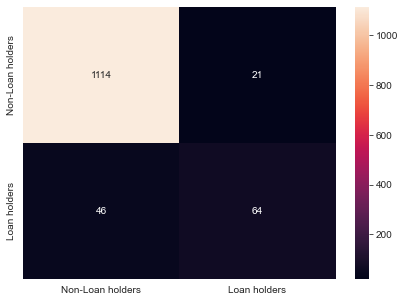

In [119]:
# Classification Accuracy
print('Accuracy on Training data:',logit.score(X_train, y_train))
print('Accuracy on Test data:',logit.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, logit_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

**Evaluation metrics allow us to estimate errors to determine how well our models
are performing:**

> Accuracy: ratio of correct predictions over total predictions.

> Precision: how often the classifier is correct when it predicts positive.

> Recall: how often the classifier is correct for all positive instances.

> F-Score: single measurement to combine precision and recall.

**Insights:**
- Training set and testing set accuracies (Almost 90%) are balanced when model is built without sampling. Also accuracy is very good in this case.
- Model is poor in predicting class 1 compared to class 0.
- Accuracy is good but in this case we need to look on recall values.
- Class 0 and Class 1 recall values are 98 and 58 respectively.
- We don't have enough sample of class 1 to train the model.
- We can improve the overall performance metrics with Oversampling, Hyper-parameter tuning and Model selection techniques.

### 3E. Balance the data using the right balancing technique.
- Check distribution of the target variable
- Say output is class A : 20% and class B : 80%
- Here you need to balance the target variable as 50:50.
- Try appropriate method to achieve the same.

In [120]:
print('Before oversampling distribution of target vector:')
print(y.value_counts())

Before oversampling distribution of target vector:
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


#### Using oversampling over complete dataset

In [121]:
# Using SMOTENC
# Create the oversampler. 
# For SMOTE-NC we need to pinpoint the column position for the categorical features in the dataset.
smote_nc=SMOTENC(categorical_features=[3,5,7,8,9,10],random_state=0)
X1, y1=smote_nc.fit_resample(X, y)

In [122]:
# Target vector is balanced after oversampling
print('After oversampling distribution of target vector:')
print(y1.value_counts())

After oversampling distribution of target vector:
0.0    4500
1.0    4500
Name: LoanOnCard, dtype: int64


In [123]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

In [124]:
# Build the Logistic Regression model
logit = LogisticRegression()

# Train the model
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

Accuracy on Training data: 0.8847407407407407
Accuracy on Test data: 0.8862222222222222
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      1110
         1.0       0.88      0.90      0.89      1140

    accuracy                           0.89      2250
   macro avg       0.89      0.89      0.89      2250
weighted avg       0.89      0.89      0.89      2250

Confusion Matrix Chart:


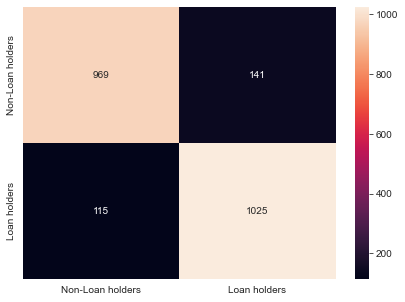

In [125]:
# Classification Accuracy
print('Accuracy on Training data:',logit.score(X_train, y_train))
print('Accuracy on Test data:',logit.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, logit_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

#### Using oversampling over training dataset only

In [126]:
# Split X and y into training and test set in 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [127]:
# Using SMOTENC
# Create the oversampler. 
# For SMOTE-NC we need to pinpoint the column position for the categorical features in the dataset.
smote_nc=SMOTENC(categorical_features=[3,5,7,8,9,10],random_state=0)
X1, y1=smote_nc.fit_resample(X_train, y_train)

### 3F. Again train the same previous model on balanced data.

In [128]:
# Build the Logistic Regression model
logit = LogisticRegression()

# Train the model
logit.fit(X1, y1)
logit_pred = logit.predict(X_test)

### 3G. Print evaluation metrics and clearly share differences observed.

Accuracy on Training data: 0.8744310575635876
Accuracy on Test data: 0.8771084337349397
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      1135
         1.0       0.41      0.86      0.55       110

    accuracy                           0.88      1245
   macro avg       0.70      0.87      0.74      1245
weighted avg       0.93      0.88      0.90      1245

Confusion Matrix Chart:


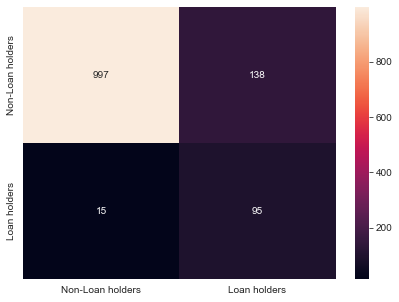

In [129]:
# Classification Accuracy
print('Accuracy on Training data:',logit.score(X_train, y_train))
print('Accuracy on Test data:',logit.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, logit_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

**Insights:**
- We can see there is decrease in test accuracy.
- After oversampling only on training data we can see difference in values.
- We are getting good recall values but the precision value is reduced.
- Hyper-parameter tuning, variable selection, and model selection methods would be used to improve the performance.

## 4. Performance Improvement:

### 4A. Train a base model each for SVM, KNN.

### 4B. Tune parameters for each of the models wherever required and finalize a model.
(Optional: Experiment with various Hyperparameters - Research required)

### Refer the relevant sections of SVM and KNN for 4A and 4B

In [130]:
# Modify the dataframe for SVM and KNN
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  4980 non-null   int64   
 1   CustomerSince        4980 non-null   int64   
 2   HighestSpend         4980 non-null   int64   
 3   HiddenScore          4980 non-null   category
 4   MonthlyAverageSpend  4980 non-null   float64 
 5   Level                4980 non-null   category
 6   Mortgage             4980 non-null   int64   
 7   Security             4980 non-null   category
 8   FixedDepositAccount  4980 non-null   category
 9   InternetBanking      4980 non-null   category
 10  CreditCard           4980 non-null   category
 11  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 397.5 KB


In [131]:
col=['HiddenScore','Level','Security','FixedDepositAccount','InternetBanking','CreditCard']
for c in col:
    dfb[c]=dfb[c].astype('int64')

In [132]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  4980 non-null   int64   
 1   CustomerSince        4980 non-null   int64   
 2   HighestSpend         4980 non-null   int64   
 3   HiddenScore          4980 non-null   int64   
 4   MonthlyAverageSpend  4980 non-null   float64 
 5   Level                4980 non-null   int64   
 6   Mortgage             4980 non-null   int64   
 7   Security             4980 non-null   int64   
 8   FixedDepositAccount  4980 non-null   int64   
 9   InternetBanking      4980 non-null   int64   
 10  CreditCard           4980 non-null   int64   
 11  LoanOnCard           4980 non-null   category
dtypes: category(1), float64(1), int64(10)
memory usage: 600.9 KB


In [133]:
dfb.head()

Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  \
9    34              9           180            1                  1.0      3   
10   65             39           105            4                  2.4      3   
11   29              5            45            3                  0.1      2   
12   48             23           114            2                  3.8      3   
13   59             32            40            4                  2.5      2   

    Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
9          0         0                    0                0           0   
10         0         0                    0                0           0   
11         0         0                    0                1           0   
12         0         1                    0                0           0   
13         0         0                    0                1           0   

   LoanOnCard  
9         1.0  
10        0.0  
11        0.0  
12        0.0  
13        0.0

#### SVM

#### Use SVM without Oversampling

Accuracy on Training data: 0.971619812583668
Accuracy on Test data: 0.9710843373493976
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1135
         1.0       0.92      0.74      0.82       110

    accuracy                           0.97      1245
   macro avg       0.95      0.87      0.90      1245
weighted avg       0.97      0.97      0.97      1245

Confusion Matrix Chart:


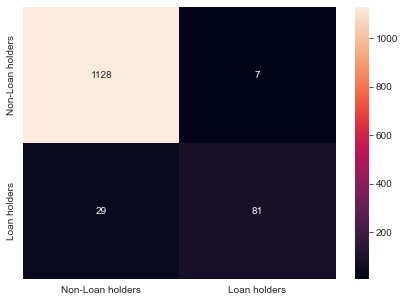

In [134]:
# Create copy of dataset.
dfb_model = dfb.copy()

# Rescaling features matrix using various scaling methods:
# scaler = RobustScaler()
scaler = MinMaxScaler()
# scaler = StandardScaler()

features = [['Age','CustomerSince','HighestSpend','HiddenScore','MonthlyAverageSpend',
             'Level','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard']]
for feature in features:
    dfb_model[feature] = scaler.fit_transform(dfb_model[feature])
    
#Create svm_model Object
svm_model = SVC()

#Create x and y variable
X = dfb_model.drop(columns=['LoanOnCard'])
y = dfb_model['LoanOnCard']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Training the model
svm_model.fit(X_train, y_train)

#Predict testing set
y_pred = svm_model.predict(X_test)

# Classification Accuracy
print('Accuracy on Training data:',svm_model.score(X_train, y_train))
print('Accuracy on Test data:',svm_model.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

#### Use SVM with Oversampling

Accuracy on Training data: 0.957429718875502
Accuracy on Test data: 0.9526104417670683
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      1135
         1.0       0.68      0.87      0.76       110

    accuracy                           0.95      1245
   macro avg       0.83      0.92      0.87      1245
weighted avg       0.96      0.95      0.96      1245

Confusion Matrix Chart:


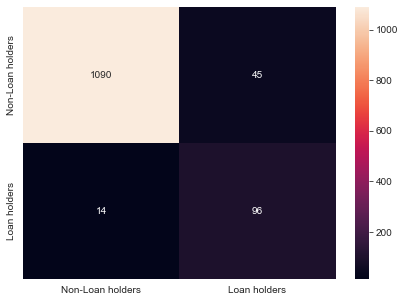

In [135]:
# Create copy of dataset.
dfb_model = dfb.copy()

# Rescaling features matrix using various scaling methods:
# scaler = RobustScaler()
scaler = MinMaxScaler()
# scaler = StandardScaler()

features = [['Age','CustomerSince','HighestSpend','HiddenScore','MonthlyAverageSpend',
             'Level','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard']]
for feature in features:
    dfb_model[feature] = scaler.fit_transform(dfb_model[feature])
    
#Create svm_model Object
svm_model = SVC()

#Create x and y variable
X = dfb_model.drop(columns=['LoanOnCard'])
y = dfb_model['LoanOnCard']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Using SMOTE
smote=SMOTE(random_state=0)
X1, y1=smote.fit_resample(X_train, y_train)

#Training the model
svm_model.fit(X1, y1)

#Predict testing set
y_pred = svm_model.predict(X_test)

# Classification Accuracy
print('Accuracy on Training data:',svm_model.score(X_train, y_train))
print('Accuracy on Test data:',svm_model.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

#### Use automated search without Oversampling for hyper-parameters.

In [136]:
# Build and train the model

# Create copy of dataset.
dfb_model = dfb.copy()

# Rescaling features matrix using various scaling methods:
# scaler = RobustScaler()
scaler = MinMaxScaler()
# scaler = StandardScaler()

features = [['Age','CustomerSince','HighestSpend','HiddenScore','MonthlyAverageSpend',
             'Level','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard']]
for feature in features:
    dfb_model[feature] = scaler.fit_transform(dfb_model[feature])
    
#Create svm_model Object
svm_model = SVC()

#Create x and y variable
X = dfb_model.drop(columns=['LoanOnCard'])
y = dfb_model['LoanOnCard']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

svm_model.fit(X_train, y_train)

SVC()

In [137]:
# Exhaustive search over specified parameter values for an estimator.
# Important members are fit, predict.

# GridSearchCV implements a "fit" and a "score" method.
# It also implements "score_samples", "predict", "predict_proba",
# "decision_function", "transform" and "inverse_transform" if they are
# implemented in the estimator used.

# The parameters of the estimator used to apply these methods are optimized
# by cross-validated grid-search over a parameter grid.

grid_params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

gs = GridSearchCV(svm_model, grid_params, cv=10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [138]:
gs.cv_results_['params']

[{'C': 0.1, 'gamma': 1, 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 1, 'kernel': 'poly'},
 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'},
 {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'},
 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'},
 {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'},
 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'},
 {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'},
 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.001, 'kernel': 'sigmoid'},
 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'},
 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'sigmoid'},
 {'C': 1, 'gamma': 1, 'kernel': 'linear'},
 {'C': 1, 'gamma': 1,

In [139]:
gs.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'poly'}

In [140]:
gs.cv_results_['mean_test_score']

array([0.93842167, 0.9665331 , 0.91940904, 0.88781523, 0.93842167,
       0.9009369 , 0.9009369 , 0.9009369 , 0.93842167, 0.9009369 ,
       0.9009369 , 0.9009369 , 0.93842167, 0.9009369 , 0.9009369 ,
       0.9009369 , 0.93842167, 0.9009369 , 0.9009369 , 0.9009369 ,
       0.95154048, 0.96787143, 0.96492667, 0.81552881, 0.95154048,
       0.92101619, 0.95287738, 0.93601024, 0.95154048, 0.9009369 ,
       0.90254333, 0.9009369 , 0.95154048, 0.9009369 , 0.9009369 ,
       0.9009369 , 0.95154048, 0.9009369 , 0.9009369 , 0.9009369 ,
       0.95073619, 0.9697481 , 0.9676062 , 0.80749452, 0.95073619,
       0.95207452, 0.96546143, 0.91834239, 0.95073619, 0.9009369 ,
       0.94832691, 0.93842167, 0.95073619, 0.9009369 , 0.90254333,
       0.9009369 , 0.95073619, 0.9009369 , 0.9009369 , 0.9009369 ,
       0.95046953, 0.96626715, 0.96706786, 0.80348239, 0.95046953,
       0.9665331 , 0.96733595, 0.90763358, 0.95046953, 0.9009369 ,
       0.95903643, 0.95154048, 0.95046953, 0.9009369 , 0.94698

In [141]:
# Lets Build SVM with best params

svm_model = SVC(C=10, gamma=1, kernel= 'poly')

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

Accuracy on Training data: 0.9860776439089692
Accuracy on Test data: 0.9759036144578314
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1135
         1.0       0.92      0.80      0.85       110

    accuracy                           0.98      1245
   macro avg       0.95      0.90      0.92      1245
weighted avg       0.98      0.98      0.98      1245

Confusion Matrix Chart:


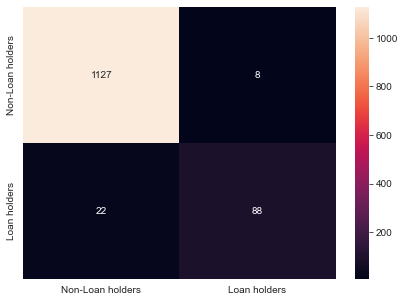

In [142]:
# Classification Accuracy
print('Accuracy on Training data:',svm_model.score(X_train, y_train))
print('Accuracy on Test data:',svm_model.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

#### Use automated search with Oversampling for hyper-parameters.

In [143]:
# Build and train the model

# Create copy of dataset.
dfb_model = dfb.copy()

# Rescaling features matrix using various scaling methods:
# scaler = RobustScaler()
scaler = MinMaxScaler()
# scaler = StandardScaler()

features = [['Age','CustomerSince','HighestSpend','HiddenScore','MonthlyAverageSpend',
             'Level','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard']]
for feature in features:
    dfb_model[feature] = scaler.fit_transform(dfb_model[feature])
    
#Create svm_model Object
svm_model = SVC()

#Create x and y variable
X = dfb_model.drop(columns=['LoanOnCard'])
y = dfb_model['LoanOnCard']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Using SMOTE
smote=SMOTE(random_state=0)
X1, y1=smote.fit_resample(X_train, y_train)

#Training the model
svm_model.fit(X1, y1)

SVC()

In [144]:
# Exhaustive search over specified parameter values for an estimator.
# Important members are fit, predict.

# GridSearchCV implements a "fit" and a "score" method.
# It also implements "score_samples", "predict", "predict_proba",
# "decision_function", "transform" and "inverse_transform" if they are
# implemented in the estimator used.

# The parameters of the estimator used to apply these methods are optimized
# by cross-validated grid-search over a parameter grid.

grid_params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

gs = GridSearchCV(svm_model, grid_params, cv=10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [145]:
gs.cv_results_['params']

[{'C': 0.1, 'gamma': 1, 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 1, 'kernel': 'poly'},
 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'},
 {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'},
 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'},
 {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'},
 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'},
 {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'},
 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.001, 'kernel': 'sigmoid'},
 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'},
 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'},
 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'},
 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'sigmoid'},
 {'C': 1, 'gamma': 1, 'kernel': 'linear'},
 {'C': 1, 'gamma': 1,

In [146]:
gs.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'poly'}

In [147]:
gs.cv_results_['mean_test_score']

array([0.93842167, 0.9665331 , 0.91940904, 0.88781523, 0.93842167,
       0.9009369 , 0.9009369 , 0.9009369 , 0.93842167, 0.9009369 ,
       0.9009369 , 0.9009369 , 0.93842167, 0.9009369 , 0.9009369 ,
       0.9009369 , 0.93842167, 0.9009369 , 0.9009369 , 0.9009369 ,
       0.95154048, 0.96787143, 0.96492667, 0.81552881, 0.95154048,
       0.92101619, 0.95287738, 0.93601024, 0.95154048, 0.9009369 ,
       0.90254333, 0.9009369 , 0.95154048, 0.9009369 , 0.9009369 ,
       0.9009369 , 0.95154048, 0.9009369 , 0.9009369 , 0.9009369 ,
       0.95073619, 0.9697481 , 0.9676062 , 0.80749452, 0.95073619,
       0.95207452, 0.96546143, 0.91834239, 0.95073619, 0.9009369 ,
       0.94832691, 0.93842167, 0.95073619, 0.9009369 , 0.90254333,
       0.9009369 , 0.95073619, 0.9009369 , 0.9009369 , 0.9009369 ,
       0.95046953, 0.96626715, 0.96706786, 0.80348239, 0.95046953,
       0.9665331 , 0.96733595, 0.90763358, 0.95046953, 0.9009369 ,
       0.95903643, 0.95154048, 0.95046953, 0.9009369 , 0.94698

In [148]:
# Lets Build SVM with best params

svm_model = SVC(C=10, gamma=1, kernel= 'poly')

svm_model.fit(X1, y1)
y_pred = svm_model.predict(X_test)

Accuracy on Training data: 0.9740294511378849
Accuracy on Test data: 0.9606425702811245
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1135
         1.0       0.74      0.85      0.79       110

    accuracy                           0.96      1245
   macro avg       0.86      0.91      0.89      1245
weighted avg       0.96      0.96      0.96      1245

Confusion Matrix Chart:


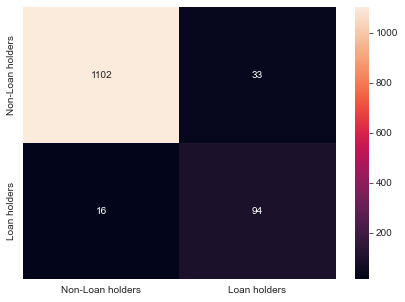

In [149]:
# Classification Accuracy
print('Accuracy on Training data:',svm_model.score(X_train, y_train))
print('Accuracy on Test data:',svm_model.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

#### KNN

#### Use KNN without Oversampling

Accuracy on Training data: 0.9646586345381526
Accuracy on Test data: 0.9582329317269076
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1135
         1.0       0.90      0.59      0.71       110

    accuracy                           0.96      1245
   macro avg       0.93      0.79      0.85      1245
weighted avg       0.96      0.96      0.95      1245

Confusion Matrix Chart:


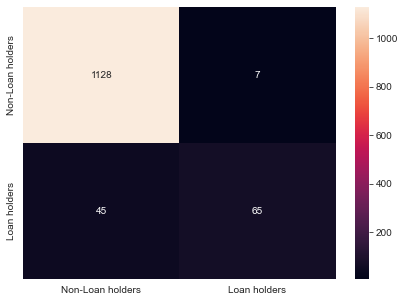

In [150]:
# Create copy of dataset.
dfb_model = dfb.copy()

# Rescaling features matrix using various scaling methods:
#scaler = RobustScaler()
scaler = MinMaxScaler()
# scaler = StandardScaler()

features = [['Age','CustomerSince','HighestSpend','HiddenScore','MonthlyAverageSpend',
             'Level','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard']]
for feature in features:
    dfb_model[feature] = scaler.fit_transform(dfb_model[feature])
    
#Create knn Object
knn = KNeighborsClassifier()

#Create x and y variable
X = dfb_model.drop(columns=['LoanOnCard'])
y = dfb_model['LoanOnCard']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Training the model
knn.fit(X_train, y_train)

#Predict testing set
y_pred = knn.predict(X_test)

# Classification Accuracy
print('Accuracy on Training data:',knn.score(X_train, y_train))
print('Accuracy on Test data:',knn.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

#### Use KNN with Oversampling

Accuracy on Training data: 0.9668005354752343
Accuracy on Test data: 0.9381526104417671
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1135
         1.0       0.61      0.85      0.71       110

    accuracy                           0.94      1245
   macro avg       0.80      0.90      0.84      1245
weighted avg       0.95      0.94      0.94      1245

Confusion Matrix Chart:


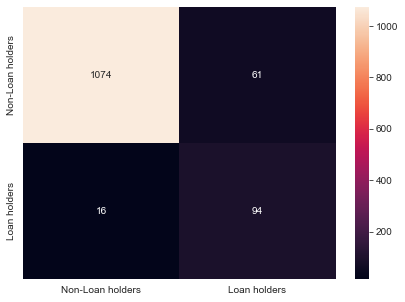

In [151]:
# Create copy of dataset.
dfb_model = dfb.copy()

# Rescaling features matrix using various scaling methods:
#scaler = RobustScaler()
scaler = MinMaxScaler()
# scaler = StandardScaler()

features = [['Age','CustomerSince','HighestSpend','HiddenScore','MonthlyAverageSpend',
             'Level','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard']]
for feature in features:
    dfb_model[feature] = scaler.fit_transform(dfb_model[feature])
    
#Create knn Object
knn = KNeighborsClassifier()

#Create x and y variable
X = dfb_model.drop(columns=['LoanOnCard'])
y = dfb_model['LoanOnCard']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Using SMOTE
smote=SMOTE(random_state=0)
X1, y1=smote.fit_resample(X_train, y_train)

#Training the model
knn.fit(X1, y1)

#Predict testing set
y_pred = knn.predict(X_test)

# Classification Accuracy
print('Accuracy on Training data:',knn.score(X_train, y_train))
print('Accuracy on Test data:',knn.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

#### Use automated search without Oversampling for hyper-parameters.

In [152]:
# Build and train the model

# Create copy of dataset.
dfb_model = dfb.copy()

# Rescaling features matrix using various scaling methods:
# scaler = RobustScaler()
scaler = MinMaxScaler()
# scaler = StandardScaler()

features = [['Age','CustomerSince','HighestSpend','HiddenScore','MonthlyAverageSpend',
             'Level','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard']]
for feature in features:
    dfb_model[feature] = scaler.fit_transform(dfb_model[feature])
    
#Create svm_model Object
knn = KNeighborsClassifier()

#Create x and y variable
X = dfb_model.drop(columns=['LoanOnCard'])
y = dfb_model['LoanOnCard']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [153]:
# Exhaustive search over specified parameter values for an estimator.
# Important members are fit, predict.

# GridSearchCV implements a "fit" and a "score" method.
# It also implements "score_samples", "predict", "predict_proba",
# "decision_function", "transform" and "inverse_transform" if they are
# implemented in the estimator used.

# The parameters of the estimator used to apply these methods are optimized
# by cross-validated grid-search over a parameter grid.

grid_params = { 'n_neighbors' : [1,3,5,7,9,11,13,15,17,19],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(knn, grid_params, cv=10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']})

In [154]:
gs.cv_results_['params']

[{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 9, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'uniform'},
 {'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'},
 {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}

In [155]:
gs.best_params_

{'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}

In [156]:
gs.cv_results_['mean_test_score']

array([0.95341429, 0.95341429, 0.95421643, 0.95609239, 0.95153761,
       0.95234047, 0.94832619, 0.9496638 , 0.94270691, 0.94618643,
       0.94190191, 0.94618643, 0.93815357, 0.94270476, 0.93520595,
       0.94056286, 0.93360095, 0.93949191, 0.93145905, 0.93681453,
       0.95341429, 0.95341429, 0.95421643, 0.95609239, 0.95153761,
       0.95234047, 0.94832619, 0.9496638 , 0.94270691, 0.94618643,
       0.94190191, 0.94618643, 0.93815357, 0.94270476, 0.93520595,
       0.94056286, 0.93360095, 0.93949191, 0.93145905, 0.93681453,
       0.94939714, 0.94939714, 0.94966022, 0.95180284, 0.94484093,
       0.94832045, 0.94431048, 0.94671474, 0.94029405, 0.94484093,
       0.93574142, 0.94243308, 0.93252928, 0.93922094, 0.9290469 ,
       0.93654285, 0.92637166, 0.93253   , 0.92556738, 0.93252857])

In [157]:
# Lets Build knn with best params

knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', weights='distance')

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Accuracy on Training data: 1.0
Accuracy on Test data: 0.9614457831325302
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1135
         1.0       0.90      0.64      0.74       110

    accuracy                           0.96      1245
   macro avg       0.93      0.81      0.86      1245
weighted avg       0.96      0.96      0.96      1245

Confusion Matrix Chart:


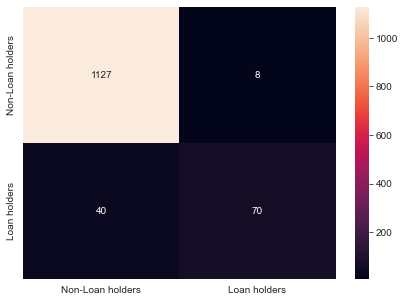

In [158]:
# Classification Accuracy
print('Accuracy on Training data:',knn.score(X_train, y_train))
print('Accuracy on Test data:',knn.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

This is a clear case of over-fitting; So we have to work with the manual search approach.

#### Use manual search for hyper-parameters.

In [159]:
# Optimize the value of k

train_score=[]
test_score=[]
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors= k , metric = 'euclidean' ) 
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

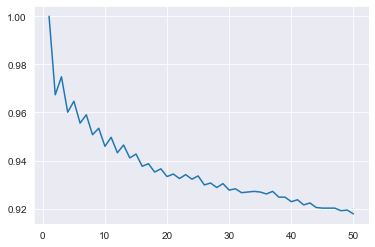

In [160]:
# train_score vs. k

plt.plot(range(1,51),train_score)
plt.show()

# Here training accuracy decreases as k increases

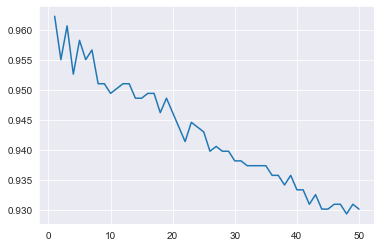

In [161]:
# test_score vs. k

plt.plot(range(1,51),test_score)
plt.show()

# The accuracy is maximum when k is less than 50. So we can cap the value of k as less than 50.

In [162]:
# Check the performance of model for various k values; Consider the k upto 10
# Build knn with k neighbors

k=[1,3,5,7,9]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Accuracy on Training data for k {} is {}:'.format(i,knn.score(X_train, y_train)))
    print('Accuracy on Test data for k {} is {}:'.format(i,knn.score(X_test, y_test)))
    print("classification  Matrix:\n",classification_report(y_test,y_pred))

Accuracy on Training data for k 1 is 1.0:
Accuracy on Test data for k 1 is 0.9622489959839358:
classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1135
         1.0       0.84      0.71      0.77       110

    accuracy                           0.96      1245
   macro avg       0.91      0.85      0.87      1245
weighted avg       0.96      0.96      0.96      1245

Accuracy on Training data for k 3 is 0.9748326639892905:
Accuracy on Test data for k 3 is 0.9606425702811245:
classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1135
         1.0       0.91      0.62      0.74       110

    accuracy                           0.96      1245
   macro avg       0.94      0.81      0.86      1245
weighted avg       0.96      0.96      0.96      1245

Accuracy on Training data for k 5 is 0.9646586345381526:
Accuracy on Test data for k 5 is 0

In [163]:
# For k=3, we can see a model with good overall performance metrics
# Lets Build knn with k=3, metric='euclidean' and weights='uniform'

knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Accuracy on Training data: 0.9748326639892905
Accuracy on Test data: 0.9606425702811245
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1135
         1.0       0.91      0.62      0.74       110

    accuracy                           0.96      1245
   macro avg       0.94      0.81      0.86      1245
weighted avg       0.96      0.96      0.96      1245

Confusion Matrix Chart:


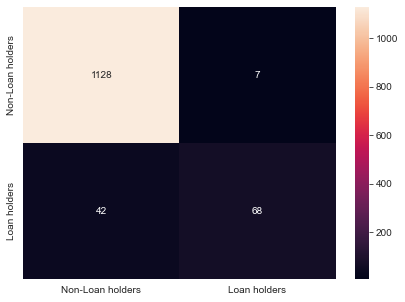

In [164]:
# Classification Accuracy
print('Accuracy on Training data:',knn.score(X_train, y_train))
print('Accuracy on Test data:',knn.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

#### Final KNN with Oversampling

Accuracy on Training data: 0.9820615796519411
Accuracy on Test data: 0.9461847389558233
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1135
         1.0       0.66      0.82      0.73       110

    accuracy                           0.95      1245
   macro avg       0.82      0.89      0.85      1245
weighted avg       0.95      0.95      0.95      1245

Confusion Matrix Chart:


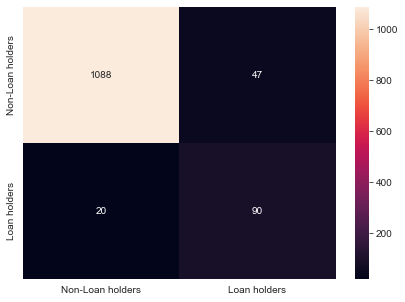

In [165]:
# Create copy of dataset.
dfb_model = dfb.copy()

# Rescaling features matrix using various scaling methods:
#scaler = RobustScaler()
scaler = MinMaxScaler()
# scaler = StandardScaler()

features = [['Age','CustomerSince','HighestSpend','HiddenScore','MonthlyAverageSpend',
             'Level','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard']]
for feature in features:
    dfb_model[feature] = scaler.fit_transform(dfb_model[feature])
    
#Create knn Object
knn = KNeighborsClassifier(n_neighbors=3, metric = 'euclidean')
#knn = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')

#Create x and y variable
X = dfb_model.drop(columns=['LoanOnCard'])
y = dfb_model['LoanOnCard']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Using SMOTE
smote=SMOTE(random_state=0)
X1, y1=smote.fit_resample(X_train, y_train)

#Training the model
knn.fit(X1, y1)

#Predict testing set
y_pred = knn.predict(X_test)

# Classification Accuracy
print('Accuracy on Training data:',knn.score(X_train, y_train))
print('Accuracy on Test data:',knn.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

### 4C. Print evaluation metrics for final model.

#### Final model with all the relevant features

In [166]:
# Using the Automated search without Oversampling for Hyperparameters of SVM

# Create copy of dataset.
dfb_model = dfb.copy()

# Rescaling features matrix using various scaling methods:
# scaler = RobustScaler()
scaler = MinMaxScaler()
# scaler = StandardScaler()

features = [['Age','CustomerSince','HighestSpend','HiddenScore','MonthlyAverageSpend',
             'Level','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard']]
for feature in features:
    dfb_model[feature] = scaler.fit_transform(dfb_model[feature])

#Create x and y variable
X = dfb_model.drop(columns=['LoanOnCard'])
y = dfb_model['LoanOnCard']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [167]:
# Lets Build SVM with best params
svm_model = SVC(C=10, gamma=1, kernel= 'poly')

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

Accuracy on Training data: 0.9860776439089692
Accuracy on Test data: 0.9759036144578314
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1135
         1.0       0.92      0.80      0.85       110

    accuracy                           0.98      1245
   macro avg       0.95      0.90      0.92      1245
weighted avg       0.98      0.98      0.98      1245

Confusion Matrix Chart:


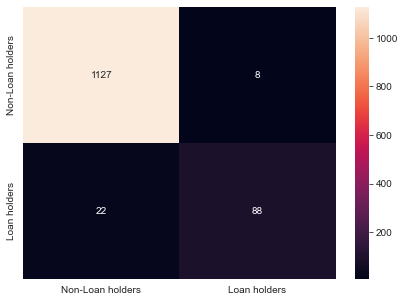

In [168]:
# Classification Accuracy
print('Accuracy on Training data:',svm_model.score(X_train, y_train))
print('Accuracy on Test data:',svm_model.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

#### Final model with all the significant features

In [169]:
# Using the Automated search without Oversampling for Hyperparameters of SVM

# Create copy of dataset.
dfb_model = dfb.copy()

# Rescaling features matrix using various scaling methods:
# scaler = RobustScaler()
scaler = MinMaxScaler()
# scaler = StandardScaler()

features = [['Age','CustomerSince','HighestSpend','HiddenScore','MonthlyAverageSpend',
             'Level','Mortgage','Security','FixedDepositAccount','InternetBanking','CreditCard']]
for feature in features:
    dfb_model[feature] = scaler.fit_transform(dfb_model[feature])

#Create x and y variable
X = dfb_model.drop(columns=['Age','CustomerSince','Security','InternetBanking','CreditCard','LoanOnCard'])
y = dfb_model['LoanOnCard']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [170]:
# Lets Build SVM with best params
svm_model = SVC(C=10, gamma=1, kernel= 'poly')

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

Accuracy on Training data: 0.9751004016064257
Accuracy on Test data: 0.9759036144578314
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1135
         1.0       0.91      0.81      0.86       110

    accuracy                           0.98      1245
   macro avg       0.94      0.90      0.92      1245
weighted avg       0.98      0.98      0.98      1245

Confusion Matrix Chart:


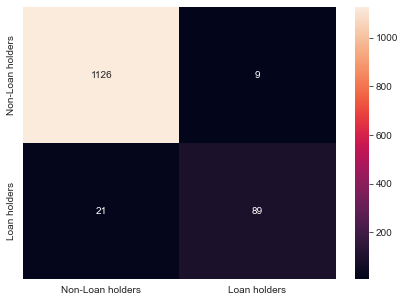

In [171]:
# Classification Accuracy
print('Accuracy on Training data:',svm_model.score(X_train, y_train))
print('Accuracy on Test data:',svm_model.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

### 4D. Share improvement achieved from base model to final model.

**Insights:**

Refer the corresponding cells for additional details; Considering the base model as Logistic Regression and final model as SVM with significant features.

1. Accuracy improved from 95% to 98%.
2. Precision for class 0 improved from 96% to 98% and for class 1 improved from 75% to 91%.
3. Recall for class 0 improved from 98% to 99% and for class 1 improved from 58% to 81%.
4. F1 Score for class 0 improved from 97% to 99% and for class 1 improved from 66% to 86%.
5. Precision & Recall values are better in predicting the potential customers.
6. Banking domain prefers to see the Precision than the Recall as to avoid false negatives.
7. If the dataset contains equal samples of both the classes, better models can be built with higher accuracy, recall and precision values.
8. Few customers do not have credit card but those customers have loan on cards. We can avoid this data error.

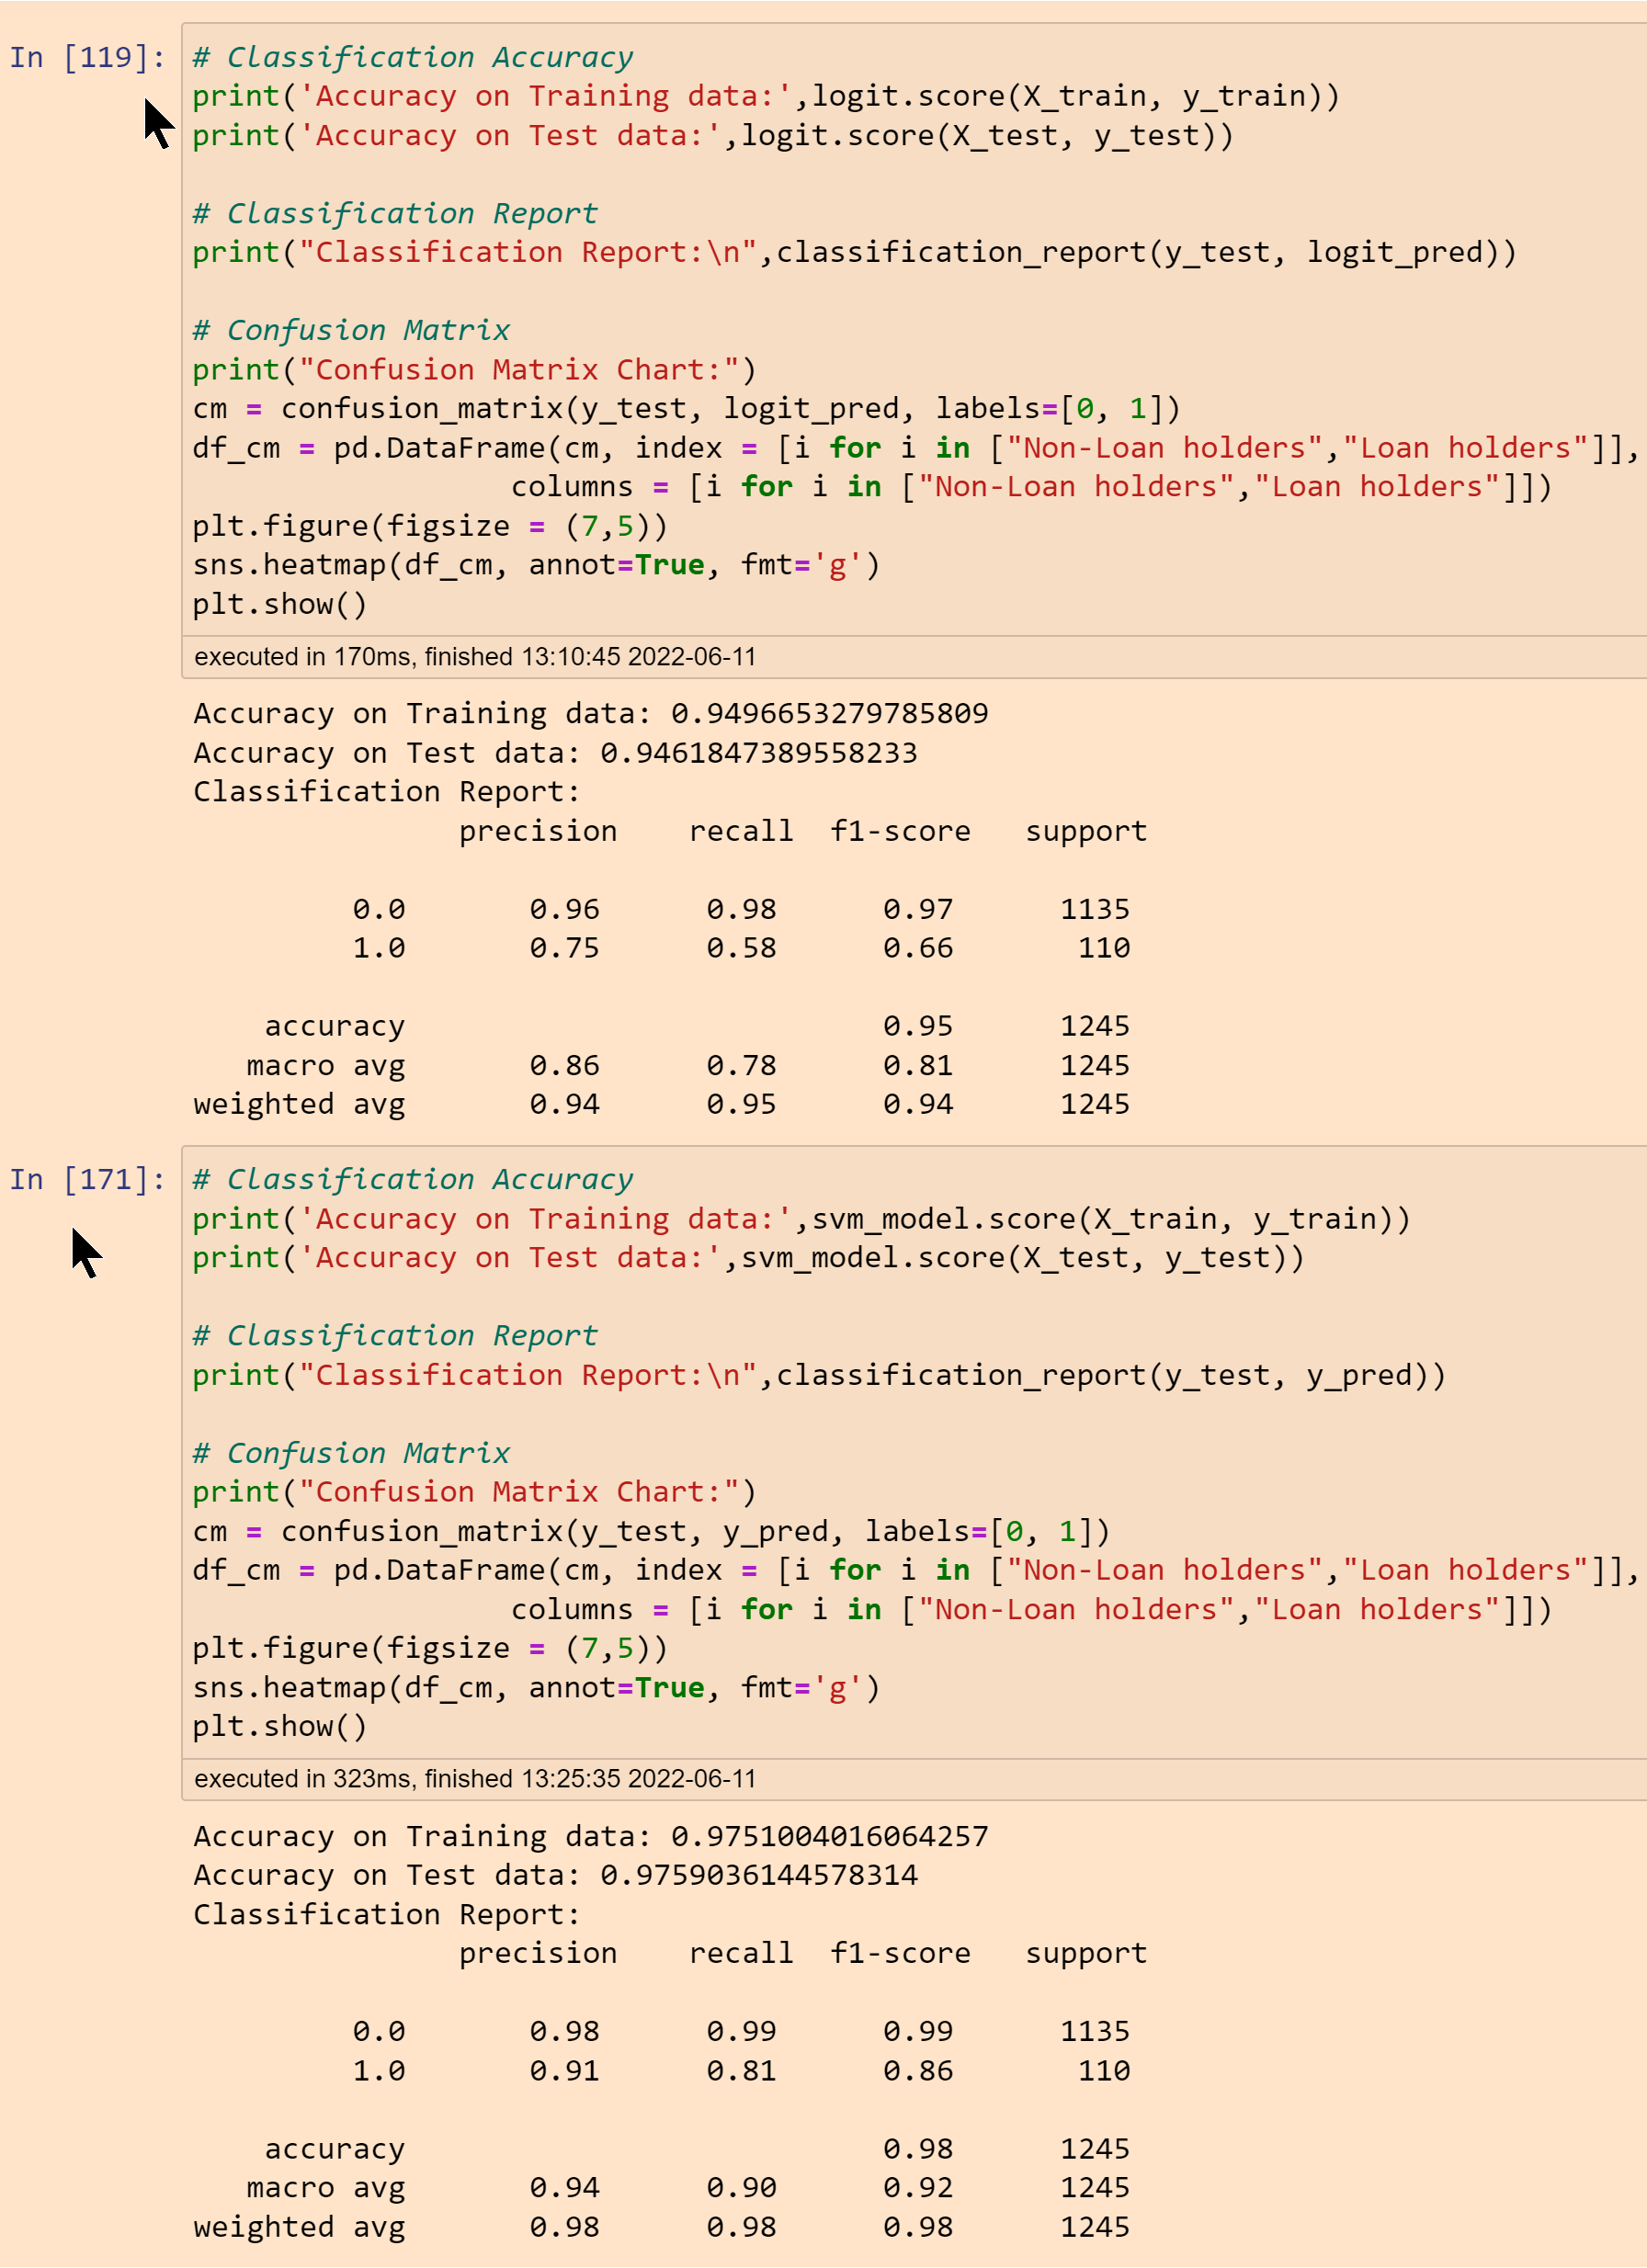

# References:

1. [Towards Data Science](https://towardsdatascience.com)
2. [Kaggle. Kaggle Code](https://www.kaggle.com/code)
3. [KdNuggets](https://www.kdnuggets.com/)
4. [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/)
5. [Wikipedia](https://en.wikipedia.org/)
6. [Numpy](https://numpy.org/)
7. [Pandas](https://pandas.pydata.org/)
8. [SciPy](https://scipy.org/)
9. [MatplotLib](https://matplotlib.org/)
10. [Seaborn](https://seaborn.pydata.org/)
11. [Python](https://www.python.org/)
12. [Plotly](https://plotly.com/)
13. [Bokeh](https://docs.bokeh.org/en/latest/)
14. [RStudio](https://www.rstudio.com/)
15. [MiniTab](https://www.minitab.com/en-us/)
16. [Anaconda](https://www.anaconda.com/)